# Top
```
michael
└───Coding
    │   Apple Watch data
    |   Just_Workouts
        │  Workouts-20240101_000000-20240630_235959.csv
        │  Workouts-20240701_000000-20240930_235959.csv
        │  Workouts-20241001_000000-20241231_235959.csv
        |  Workouts-20250101_000000-20250315_235959.csv
        |
```
Coding is in CMS and is on laptop.  
`Just_Workouts` is the data file for just the workout data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import re
import numpy as np
import subprocess
import datetime

In [3]:

_ = subprocess.call(['open',  os.getcwd()]) 

Go to the Workout Data file

In [4]:
os.chdir('Just_Workouts')

## List Overviews of Workouts

In [17]:
[ i for i in os.listdir() if i.startswith('Workouts')]

['Workouts-20240701_000000-20240930_235959.csv',
 'Workouts-20250101_000000-20250315_235959.csv',
 'Workouts-20241001_000000-20241231_235959.csv',
 'Workouts-20240101_000000-20240630_235959.csv']

## List And Rename Workout Files

In [18]:
def list_and_rename_workout_files(directory_path):
    """
    This function lists all files in the given directory that start with the characters 'Workouts',
    and for CSV files with the format 'Workouts-YYYYMMDD_HHMMSS-YYYYMMDD_HHMMSS.csv', it creates a copy
    and renames it to 'Workouts-YYYY-MM_DD_YYYY_MM_DD.csv'.

    :param directory_path: The path to the directory where files are located.
    :return: A list of original and new filenames.
    List all files in the directory starting with "Workouts" and ending with ".csv".
    Parse the filenames.
    Create copies with the new format and save them in the same directory.
    Return a list of tuples containing the original and new filenames. ​
    """
    # List all files in the directory
    all_files = os.listdir(directory_path)
    
    # Filter files that start with 'Workouts' and end with '.csv'
    workout_files = [file for file in all_files if file.startswith('Workouts') and file.endswith('.csv')]

    renamed_files = []
    
    for file in workout_files:
        match = re.match(r'Workouts-(\d{8})_(\d{6})-(\d{8})_(\d{6})\.csv', file)
        if match:
            start_date = match.group(1)
            end_date = match.group(3)
            new_name = f"Workouts-{start_date[:4]}-{start_date[4:6]}-{start_date[6:8]}_{end_date[:4]}-{end_date[4:6]}-{end_date[6:8]}.csv"
            original_path = os.path.join(directory_path, file)
            new_path = os.path.join(directory_path, new_name)
            shutil.copy(original_path, new_path)
            renamed_files.append((file, new_name))
    
    return renamed_files

# Example usage
directory_path =os.getcwd() # Replace with your directory path
renamed_files = list_and_rename_workout_files(directory_path)
for num, name in enumerate(renamed_files, start=1): 
	print("{0:3}: {1}".format(num, name))
 

  1: ('Workouts-20240701_000000-20240930_235959.csv', 'Workouts-2024-07-01_2024-09-30.csv')
  2: ('Workouts-20250101_000000-20250315_235959.csv', 'Workouts-2025-01-01_2025-03-15.csv')
  3: ('Workouts-20241001_000000-20241231_235959.csv', 'Workouts-2024-10-01_2024-12-31.csv')
  4: ('Workouts-20240101_000000-20240630_235959.csv', 'Workouts-2024-01-01_2024-06-30.csv')


### Renamed Files
- Format is Workouts-2024-02-04_2024-05-04.csv

In [22]:
list_files = [file[1] for file in renamed_files]
list_files

['Workouts-2024-07-01_2024-09-30.csv',
 'Workouts-2025-01-01_2025-03-15.csv',
 'Workouts-2024-10-01_2024-12-31.csv',
 'Workouts-2024-01-01_2024-06-30.csv']

## Most Recent File
- extract_data takes file name 

In [23]:
import re
import datetime
import os

def extract_dates(file_name):
    """
    Extracts the start and end dates from a given file name formatted as 
    'YYYY-MM-DD_YYYY-MM-DD.csv'.

    Parameters:
        file_name (str): The name of the file containing the date range.

    Returns:
        tuple[str, datetime.datetime, datetime.datetime] | None:
        A tuple containing the file name, start date, and end date as datetime objects,
        or None if the file name does not match the expected format.
    """
    match = re.search(r'(\d{4}-\d{2}-\d{2})_(\d{4}-\d{2}-\d{2})\.csv', file_name)
    if match:
        start_date_str, end_date_str = match.groups()
        start_date = datetime.datetime.strptime(start_date_str, '%Y-%m-%d')
        end_date = datetime.datetime.strptime(end_date_str, '%Y-%m-%d')
        return file_name, start_date, end_date
    return None

def find_most_recent_file(file_list):
    """
    Finds the file with the most recent end date from a list of filenames.

    Parameters:
        file_list (list): A list of file names following the format 'YYYY-MM-DD_YYYY-MM-DD.csv'.

    Returns:
        str | None: The file name with the most recent dataset or None if no valid files exist.
    """
    print('File Names:')
    for num, name in enumerate(file_list, start=1): 
        print("{0:3}: {1}".format(num, name))

    valid_files = [extract_dates(f) for f in file_list if extract_dates(f) is not None]
    
    
    
    if not valid_files:
        return None  # No valid files found

    # Find the file with the latest end date
    most_recent_file = max(valid_files, key=lambda x: x[2])[0]  # Extract file name

    return most_recent_file

# # Example file list
# list_files = [
#     "2025-01-01_2025-03-31.csv",
#     "2024-04-01_2024-06-30.csv",
#     "2024-07-01_2024-09-30.csv",
#     "2024-10-01_2024-12-31.csv",  # Most recent
#     "invalid_file.csv"  # Should be ignored
# ]
for num, name in enumerate(list_files, start=1): 
	print("{0:3}: {1}".format(num, name))
 

most_recent_file = find_most_recent_file(list_files)

# Output the most recent file
if most_recent_file:
    print("The file with the most recent dataset is:", most_recent_file)
else:
    print("No valid files found.")


  1: Workouts-2024-07-01_2024-09-30.csv
  2: Workouts-2025-01-01_2025-03-15.csv
  3: Workouts-2024-10-01_2024-12-31.csv
  4: Workouts-2024-01-01_2024-06-30.csv
File Names:
  1: Workouts-2024-07-01_2024-09-30.csv
  2: Workouts-2025-01-01_2025-03-15.csv
  3: Workouts-2024-10-01_2024-12-31.csv
  4: Workouts-2024-01-01_2024-06-30.csv
The file with the most recent dataset is: Workouts-2025-01-01_2025-03-15.csv


### Concatenate the files

In [24]:
list_files

['Workouts-2024-07-01_2024-09-30.csv',
 'Workouts-2025-01-01_2025-03-15.csv',
 'Workouts-2024-10-01_2024-12-31.csv',
 'Workouts-2024-01-01_2024-06-30.csv']

In [39]:


def concatenate_csv_files(file_list, output_file):
    """
    Concatenates a list of CSV files after verifying that all files have the same
    number of columns, column names, and column order.

    Parameters:
        file_list (list): List of CSV file paths to be concatenated.
        output_file (str, optional): Path to save the concatenated CSV file. 
                                     If None, the concatenated DataFrame is returned.

    Returns:
        pd.DataFrame | None: The concatenated DataFrame if output_file is None.
                             Otherwise, the function saves the file and returns None.
    """
    if not file_list:
        print("Error: No files provided.")
        return None

    reference_df = pd.read_csv(file_list[0])  # Read first file as reference
    reference_df["Start"] = pd.to_datetime(reference_df["Start"], errors="coerce")
    reference_df["End"] = pd.to_datetime(reference_df["End"], errors="coerce")    
    expected_columns = list(reference_df.columns)
    
    concatenated_data = [reference_df]  # Store DataFrames for merging

    for file in file_list[1:]:
        df = pd.read_csv(file)

        # Check if number of columns matches
        if df.shape[1] != len(expected_columns):
            print(f"Error: Column count mismatch in {file}. Expected {len(expected_columns)}, found {df.shape[1]}.")
            return None

        # Check if column names match
        if list(df.columns) != expected_columns:
            print(f"Error: Column names or order mismatch in {file}.")
            return None

        # Convert 'Start' and 'End' columns to datetime format
        df["Start"] = pd.to_datetime(df["Start"], errors="coerce")
        df["End"] = pd.to_datetime(df["End"], errors="coerce")
        concatenated_data.append(df)



    # Combine all files
    final_df = pd.concat(concatenated_data, ignore_index=True)

    # Sort by 'Start' date
    final_df = final_df.sort_values(by="Start").reset_index(drop=True)


    print(final_df.shape)
    final_df.to_csv(output_file, index=False)
    print(f"Concatenated CSV saved to {output_file}")
    return final_df

# Example usage:
output_file = "merged_data.csv"

concatenated_df = concatenate_csv_files(list_files, output_file)
concatenated_df.head()

(861, 14)
Concatenated CSV saved to merged_data.csv


,Workout Type,Start,End,Duration,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (mi),Max. Speed (mi/hr),Avg. Speed (mi/hr),Elevation Ascended (ft),Elevation Descended (ft),Location,Unnamed: 13
0,Other,2024-03-25 06:00:00,2024-03-25 06:21:00,00:21:05,93.105000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,Core Training,2024-03-25 12:41:00,2024-03-25 12:59:00,00:18:26,41.572389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,Core Training,2024-03-25 13:42:00,2024-03-25 13:54:00,00:11:52,44.903000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,Core Training,2024-03-26 07:56:00,2024-03-26 08:39:00,00:42:41,141.096000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Core Training,2024-03-26 13:34:00,2024-03-26 14:17:00,00:42:55,140.088000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [43]:
concatenated_df.dtypes

Workout Type                        object
Start                       datetime64[ns]
End                         datetime64[ns]
Duration                            object
Active Energy (kcal)               float64
Max. Heart Rate (bpm)              float64
Avg. Heart Rate (bpm)              float64
Distance (mi)                      float64
Max. Speed (mi/hr)                 float64
Avg. Speed (mi/hr)                 float64
Elevation Ascended (ft)            float64
Elevation Descended (ft)           float64
Location                            object
Unnamed: 13                        float64
dtype: object

**Now we have ONE large concatenated file**

## List Types of Workouts (and Duration of each Workout)

In [50]:

def count_workout_types(df):
    """
    Counts the number of occurrences of each Workout Type and sorts them in descending order.

    Parameters:
        df (pd.DataFrame): The DataFrame containing a 'Workout Type' column.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'Workout Type' and 'Count', sorted in descending order.
    """
    if "Workout Type" not in df.columns:
        print("Error: 'Workout Type' column not found in the DataFrame.")
        return None

    # Count occurrences of each Workout Type
    workout_counts = df["Workout Type"].value_counts().reset_index()

    # Rename columns
    workout_counts.columns = ["Workout Type", "Count"]

    # Sort in descending order
    workout_counts = workout_counts.sort_values(by="Count", ascending=False)

    return workout_counts

# Example usage:
# Assuming df is your DataFrame containing a 'Workout Type' column
# df = pd.read_csv("workouts.csv")
# result_df = count_workout_types(df)
# print(result_df)

result_df = count_workout_types(concatenated_df)
print(result_df)


      Workout Type  Count
0   Indoor Cycling    267
1    Core Training    207
2  Outdoor Cycling    157
3     Outdoor Walk    104
4      Indoor Walk     80
5           Rowing     32
6            Other     13
7          Cycling      1


In [53]:

def list_workout_sessions(df):
    """
    Lists each workout session's date, start time, end time, and duration in minutes.

    Parameters:
        df (pd.DataFrame): The DataFrame containing 'Workout Type', 'Start', and 'End' columns.

    Returns:
        pd.DataFrame: A DataFrame with columns - 'Workout Type', 'Date', 'Start', 'End', and 'Duration' (in minutes).
    """
    required_columns = {"Workout Type", "Start", "End"}
    
    # Ensure required columns exist
    if not required_columns.issubset(df.columns):
        print("Error: Required columns ('Workout Type', 'Start', 'End') are missing from the DataFrame.")
        return None

    # Convert 'Start' and 'End' columns to datetime format
    df["Start"] = pd.to_datetime(df["Start"], errors="coerce")
    df["End"] = pd.to_datetime(df["End"], errors="coerce")

    # Calculate duration in minutes and convert to integer
    df["Duration"] = (df["End"] - df["Start"]).dt.total_seconds() // 60
    df["Duration"] = df["Duration"].astype("Int64")  # Keeps NaN values as <NA> instead of converting to float

    # Extract date separately from start time
    df["Date"] = df["Start"].dt.date

    # Keep only required columns
    result_df = df[["Workout Type", "Date", "Start", "End", "Duration"]]

    return result_df


workout_sessions_df = list_workout_sessions(concatenated_df)
workout_sessions_df.head()

,Workout Type,Date,Start,End,Duration
0,Other,2024-03-25,2024-03-25 06:00:00,2024-03-25 06:21:00,21
1,Core Training,2024-03-25,2024-03-25 12:41:00,2024-03-25 12:59:00,18
2,Core Training,2024-03-25,2024-03-25 13:42:00,2024-03-25 13:54:00,12
3,Core Training,2024-03-26,2024-03-26 07:56:00,2024-03-26 08:39:00,43
4,Core Training,2024-03-26,2024-03-26 13:34:00,2024-03-26 14:17:00,43


### Show just specific Workout Types

In [76]:
import pandas as pd

def filter_workout_type(df, workout_type):
    """
    Filters the DataFrame to include only rows with the specified Workout Type.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing a 'Workout Type' column.
        workout_type (str): The specific workout type to filter for.

    Returns:
        pd.DataFrame: A new DataFrame containing only rows with the specified Workout Type.
    """
    if "Workout Type" not in df.columns:
        print("Error: 'Workout Type' column not found in the DataFrame.")
        return None

    # Filter rows based on the specified Workout Type
    filtered_df = df[df["Workout Type"] == workout_type].copy()

    return filtered_df

# Example usage:
# df = pd.read_csv("workouts.csv")  # Load your dataset


list_workout_types  = list(set(workout_sessions_df['Workout Type']))
list_workout_types.sort()
for num, workout_type in enumerate(list_workout_types, start=1): 
    Workout_Type_df = filter_workout_type(workout_sessions_df, workout_type)
    Workout_Type_df = Workout_Type_df.reset_index(drop=True)
    print("{0:3}: {1:20}   {2:3}".format(num, workout_type, Workout_Type_df.shape[0]))

    Workout_Type_df.head()

  1: Core Training          207
  2: Cycling                  1
  3: Indoor Cycling         267
  4: Indoor Walk             80
  5: Other                   13
  6: Outdoor Cycling        157
  7: Outdoor Walk           104
  8: Rowing                  32


In [77]:
os.getcwd()

'/Users/michael/Coding/Apple_Watch_data/Just_Workouts'


<div class="alert alert-block alert-danger">
we are in Just_Workouts
    
    
    STOPPING 2025-03-15 March 15, 2025 March 15, 2025 2:52 PM 
</div>

 

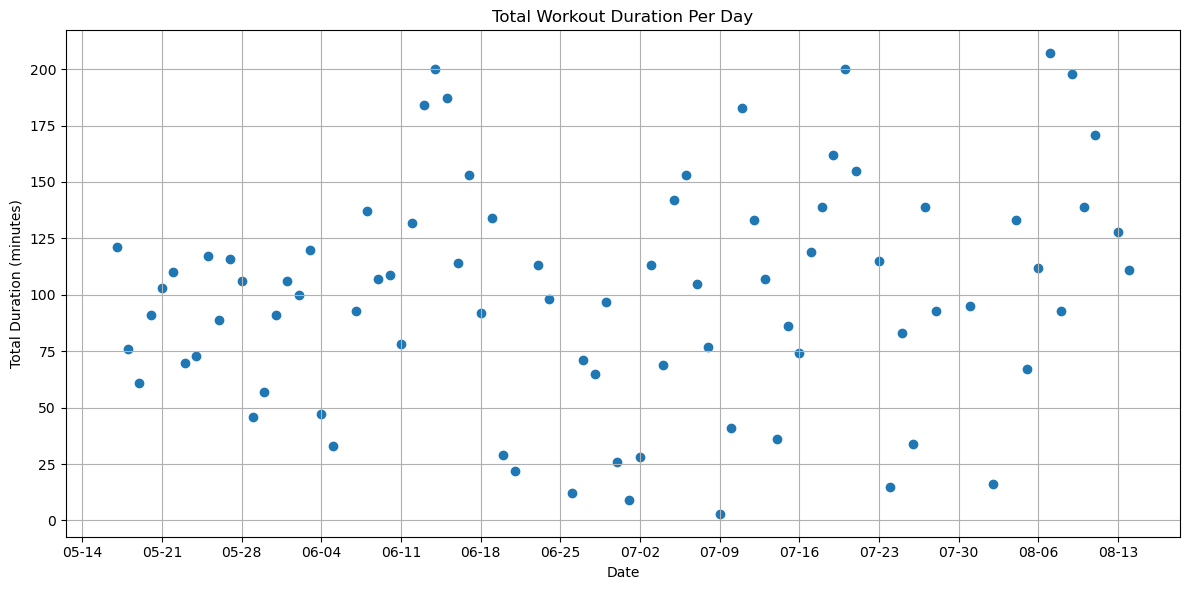

(81, 2)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def ensure_correct_data_types_and_calculate_duration(df):
    # Ensure 'Start' and 'End' columns are in datetime format
    df['Start'] = pd.to_datetime(df['Start'])
    df['End'] = pd.to_datetime(df['End'])
    
    # Calculate 'Duration' as the difference in minutes between 'End' and 'Start'
    df['Duration'] = (df['End'] - df['Start']).dt.total_seconds() / 60
    df['Duration'] = df['Duration'].astype(int)
    
    # Extract date from 'Start' and create a new column for it
    df['Date'] = df['Start'].dt.date
    
    # Group by the new 'Date' column and sum the 'Duration' column
    total_duration_per_day = df.groupby('Date')['Duration'].sum().reset_index()
    
    # Convert 'Date' back to datetime format for plotting
    total_duration_per_day['Date'] = pd.to_datetime(total_duration_per_day['Date'])
    
    # Rename the columns for better clarity
    total_duration_per_day.columns = ['Date', 'Total Duration']
    
    return total_duration_per_day

def plot_total_duration(total_duration_df):
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(total_duration_df['Date'], total_duration_df['Total Duration'], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Total Duration (minutes)')
    plt.title('Total Workout Duration Per Day')
    
    # Set x-axis major ticks to be every 7 days
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# df = pd.read_csv('your_file.csv')
# total_duration_df = ensure_correct_data_types_and_calculate_duration(df)
# plot_total_duration(total_duration_df)

total_duration_df = ensure_correct_data_types_and_calculate_duration(data)
plot_total_duration(total_duration_df)
total_duration_df.shape

In [13]:
if file_path == most_recent_file:
    print(f'\033[1mfile_path\033[0m and \033[1mmost_recent_file\033[0m refer to the same file')

file_path and most_recent_file refer to the same file


## Plot Workout Duration

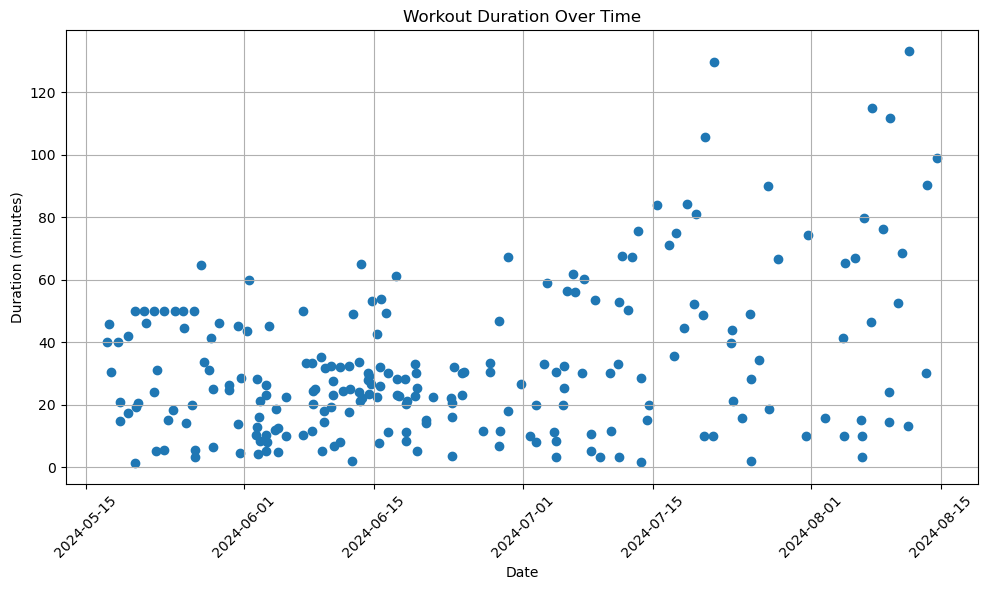

In [14]:
def plot_workout_duration(file_path):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Convert 'Start' column to datetime
    data['Start'] = pd.to_datetime(data['Start'])
    
    # Convert 'Duration' column to total minutes
    data['Duration (mins)'] = pd.to_timedelta(data['Duration']).dt.total_seconds() / 60
    
    # Plotting the workout duration over time
    plt.figure(figsize=(10, 6))
    # plt.plot(data['Start'], data['Duration (mins)'], marker='o', linestyle='-')

    plt.scatter(data['Start'], data['Duration (mins)'], marker='o')
    # plt.plot(data['Start'], data['Duration (mins)'], marker='o')
    plt.title('Workout Duration Over Time')
    plt.xlabel('Date')
    plt.ylabel('Duration (minutes)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage example:
plot_workout_duration(file_path)


## Count Workout Days

In [15]:

def count_workout_days(file_path, index_column):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Convert 'Start' column to datetime to ensure correct parsing
    data['Start'] = pd.to_datetime(data['Start']).dt.date
    
    # Group by 'Workout Type' and count unique days
    days_count = data.groupby(index_column)['Start'].nunique()
    
    return days_count

# Usage example:
index_column = 'Workout Type'
workout_days_count = count_workout_days(file_path, index_column)
print(workout_days_count)


Workout Type
Core Training      26
Indoor Cycling     52
Indoor Walk         7
Other               1
Outdoor Cycling    38
Outdoor Walk       45
Rowing             11
Name: Start, dtype: int64


## List Workout Days

In [82]:

def list_workout_days(file_path, index_column):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Convert 'Start' column to datetime to ensure correct parsing
    data['Start'] = pd.to_datetime(data['Start'])
    
    # Extract the date and day of the week, and format it
    data['Day'] = data['Start'].dt.strftime('%Y-%m-%d (%a)')
    
    # Group by 'Workout Type' and collect unique, sorted days
    workout_days = data.groupby(index_column)['Day'].apply(lambda x: sorted(x.unique()))
    return workout_days

# Usage example:
index_column = 'Workout Type'
workout_days_list = list_workout_days(file_path, index_column)
print(workout_days_list)


Workout Type
Core Training      [2024-05-26 (Sun), 2024-05-28 (Tue), 2024-05-3...
Indoor Cycling     [2024-05-17 (Fri), 2024-05-18 (Sat), 2024-05-1...
Indoor Walk        [2024-06-04 (Tue), 2024-06-05 (Wed), 2024-06-2...
Other                                             [2024-06-28 (Fri)]
Outdoor Cycling    [2024-05-25 (Sat), 2024-05-31 (Fri), 2024-06-1...
Outdoor Walk       [2024-05-17 (Fri), 2024-05-18 (Sat), 2024-05-1...
Rowing             [2024-05-22 (Wed), 2024-05-23 (Thu), 2024-05-2...
Name: Day, dtype: object


In [83]:
file_path 
data = pd.read_csv(file_path)
data.head()

,Workout Type,Start,End,Duration,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (mi),Max. Speed (mi/hr),Avg. Speed (mi/hr),Elevation Ascended (ft),Elevation Descended (ft),Location,Unnamed: 13
0,Outdoor Cycling,2024-08-14 12:54,2024-08-14 14:45,01:39:07,582.480410,123.0,96.259051,20.011887,0.0,0.0,419.028871,0.0,Outdoor,NaN
1,Outdoor Cycling,2024-08-13 12:43,2024-08-13 14:21,01:30:20,728.040219,118.0,110.800000,21.014011,0.0,0.0,439.862205,0.0,Outdoor,NaN
2,Indoor Cycling,2024-08-13 08:44,2024-08-13 09:14,00:30:10,185.167787,138.0,120.707741,0.000000,0.0,0.0,0.000000,0.0,Indoor,NaN
3,Outdoor Cycling,2024-08-11 12:48,2024-08-11 15:26,02:13:16,841.408105,134.0,103.309240,27.881372,0.0,0.0,594.980315,0.0,Outdoor,NaN
4,Indoor Cycling,2024-08-11 11:39,2024-08-11 11:52,00:13:02,49.758930,94.0,78.047619,0.000000,0.0,0.0,0.000000,0.0,Indoor,NaN


## Find Outdoor Cycling

In [98]:
mask = data['Workout Type'] == 'Outdoor Cycling'
data['Distance (mi)'] = data['Distance (mi)'].apply (lambda x : round(x,2))
data['Start'] = data['Start'].apply (lambda x : x.split(' ')[0])
cycling_data = data.loc[mask,['Start','Duration', 'Distance (mi)','Avg. Heart Rate (bpm)','Max. Heart Rate (bpm)']]
# data.columns
cycling_data.to_csv('cycling_data.csv', index = False)
cycling_data.head()

,Start,Duration,Distance (mi),Avg. Heart Rate (bpm),Max. Heart Rate (bpm)
0,2024-08-14,01:39:07,20.01,96.259051,123.0
1,2024-08-13,01:30:20,21.01,110.800000,118.0
3,2024-08-11,02:13:16,27.88,103.309240,134.0
5,2024-08-10,01:08:25,14.13,95.306413,116.0
7,2024-08-09,01:51:38,22.81,91.499129,118.0


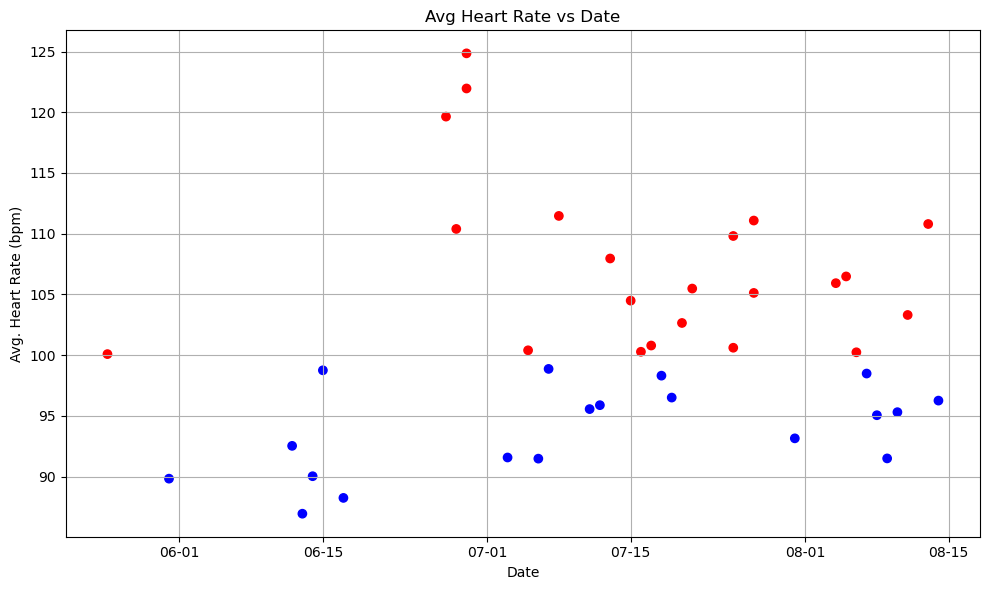

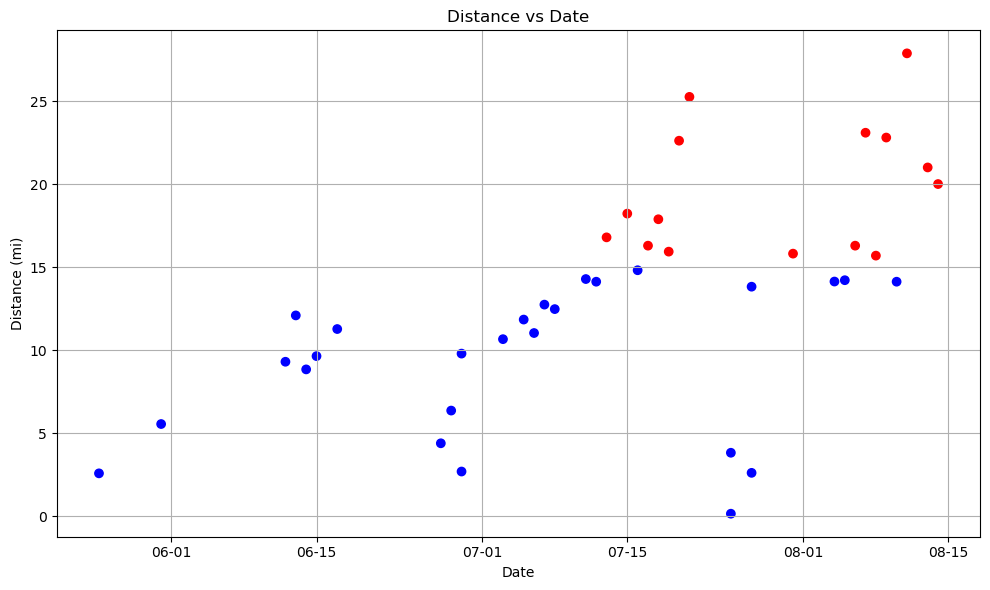

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distance_vs_date(data, title, parameter, y_label, threshold):
    # Convert the 'Start' column to datetime format
    data['Start'] = pd.to_datetime(data['Start'])
    
    # Sort the data by date
    data = data.sort_values('Start')
    
    # Determine colors based on threshold
    colors = ['r' if val > threshold else 'b' for val in data[parameter]]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Start'], data[parameter], c=colors, marker='o')
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Format x-ticks to show month-day and set rotation to 0
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    plt.show()

# Example usage with the cycling data
title = 'Avg Heart Rate vs Date'
parameter = 'Avg. Heart Rate (bpm)'
y_label = parameter
threshold = 100  # Set the threshold value here

plot_distance_vs_date(cycling_data, title, parameter, y_label, threshold)


# Example usage with the cycling data
title = 'Distance vs Date'
parameter = 'Distance (mi)'
y_label = parameter
threshold = 15  # Set the threshold value here

plot_distance_vs_date(cycling_data, title, parameter, y_label, threshold)


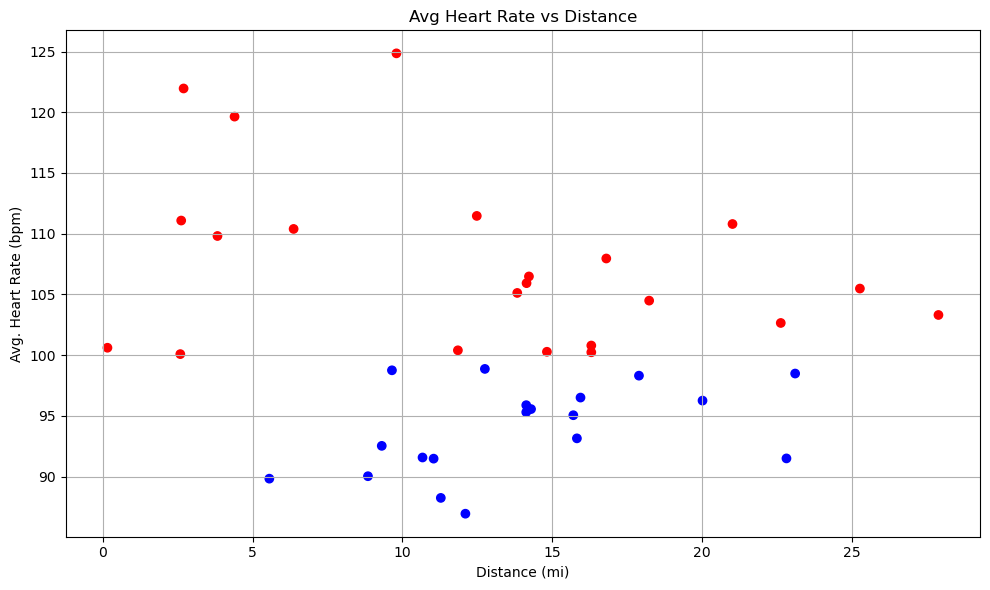

In [105]:
import matplotlib.pyplot as plt

def plot_avg_hr_vs_distance(data, title, threshold):
    # Convert the 'Start' column to datetime format
    data['Start'] = pd.to_datetime(data['Start'])
    
    # Determine colors based on threshold for average heart rate
    colors = ['r' if val > threshold else 'b' for val in data['Avg. Heart Rate (bpm)']]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Distance (mi)'], data['Avg. Heart Rate (bpm)'], c=colors, marker='o')
    
    plt.title(title)
    plt.xlabel('Distance (mi)')
    plt.ylabel('Avg. Heart Rate (bpm)')
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

# Example usage with the cycling data
title = 'Avg Heart Rate vs Distance'
threshold = 100  # Set the threshold value here

plot_avg_hr_vs_distance(cycling_data, title, threshold)


## List Workouts By Type

In [106]:

def list_workouts_by_type(file_path):
    """
    This function lists workouts by type, each day the workout occurred, and the duration of the workout.
    The duration is formatted as an integer representing the total minutes.

    :param file_path: The path to the CSV file containing the workout data.
    :return: A dictionary where the keys are workout types and the values are lists of tuples (date, duration).
    """
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Ensure necessary columns are present
    required_columns = ['Workout Type', 'Start', 'Duration']
    if not all(column in data.columns for column in required_columns):
        raise ValueError(f"The CSV file must contain the following columns: {required_columns}")

    # Convert the 'Start' column to datetime format
    data['Start'] = pd.to_datetime(data['Start'])

    # Function to convert duration from 'HH:MM:SS' to total minutes as an integer
    def duration_to_minutes(duration):
        h, m, s = map(int, duration.split(':'))
        return h * 60 + m

    # Create a dictionary to store the workouts by type
    workouts_by_type = {}

    for _, row in data.iterrows():
        workout_type = row['Workout Type']
        date = row['Start'].strftime('%Y-%m-%d')
        duration = duration_to_minutes(row['Duration'])

        if workout_type not in workouts_by_type:
            workouts_by_type[workout_type] = []
        
        workouts_by_type[workout_type].append((date, duration))

    return workouts_by_type

# Example usage
most_recent_file
workouts_by_type = list_workouts_by_type(most_recent_file)

# Convert the dictionary to a DataFrame for better display
workouts_df = pd.DataFrame.from_dict(workouts_by_type, orient='index').T
display(workouts_df)  # Use display() in a Jupyter notebook to show the DataFrame
print(workouts_df)    # Use print() to show the DataFrame in a console environment

# Show the workouts by type
workouts_by_type
workouts_by_type = list_workouts_by_type(most_recent_file)
# print(workouts_by_type)

,Outdoor Cycling,Indoor Cycling,Outdoor Walk,Rowing,Indoor Walk,Core Training,Other
0,"(2024-08-14, 99)","(2024-08-13, 30)","(2024-08-10, 52)","(2024-08-06, 3)","(2024-07-26, 34)","(2024-07-13, 28)","(2024-06-28, 6)"
1,"(2024-08-13, 90)","(2024-08-11, 13)","(2024-08-09, 24)","(2024-07-13, 1)","(2024-07-25, 49)","(2024-07-08, 10)",None
2,"(2024-08-11, 133)","(2024-08-06, 10)","(2024-08-09, 14)","(2024-07-11, 3)","(2024-07-24, 15)","(2024-07-04, 8)",None
3,"(2024-08-10, 68)","(2024-08-06, 15)","(2024-08-07, 46)","(2024-07-09, 3)","(2024-06-30, 26)","(2024-07-04, 11)",None
4,"(2024-08-09, 111)","(2024-08-04, 10)","(2024-08-04, 41)","(2024-07-04, 3)","(2024-06-28, 11)","(2024-06-24, 30)",None
...,...,...,...,...,...,...,...
69,None,"(2024-05-19, 42)",None,None,None,None,None
70,None,"(2024-05-18, 20)",None,None,None,None,None
71,None,"(2024-05-18, 40)",None,None,None,None,None
72,None,"(2024-05-17, 30)",None,None,None,None,None


      Outdoor Cycling    Indoor Cycling      Outdoor Walk           Rowing  \
0    (2024-08-14, 99)  (2024-08-13, 30)  (2024-08-10, 52)  (2024-08-06, 3)   
1    (2024-08-13, 90)  (2024-08-11, 13)  (2024-08-09, 24)  (2024-07-13, 1)   
2   (2024-08-11, 133)  (2024-08-06, 10)  (2024-08-09, 14)  (2024-07-11, 3)   
3    (2024-08-10, 68)  (2024-08-06, 15)  (2024-08-07, 46)  (2024-07-09, 3)   
4   (2024-08-09, 111)  (2024-08-04, 10)  (2024-08-04, 41)  (2024-07-04, 3)   
..                ...               ...               ...              ...   
69               None  (2024-05-19, 42)              None             None   
70               None  (2024-05-18, 20)              None             None   
71               None  (2024-05-18, 40)              None             None   
72               None  (2024-05-17, 30)              None             None   
73               None  (2024-05-17, 40)              None             None   

         Indoor Walk     Core Training            Other  
0   (

In [107]:
workouts_by_type['Outdoor Cycling']

[('2024-08-14', 99),
 ('2024-08-13', 90),
 ('2024-08-11', 133),
 ('2024-08-10', 68),
 ('2024-08-09', 111),
 ('2024-08-08', 76),
 ('2024-08-07', 114),
 ('2024-08-06', 79),
 ('2024-08-05', 67),
 ('2024-08-04', 65),
 ('2024-07-31', 74),
 ('2024-07-27', 18),
 ('2024-07-27', 89),
 ('2024-07-25', 28),
 ('2024-07-25', 1),
 ('2024-07-21', 129),
 ('2024-07-20', 105),
 ('2024-07-19', 80),
 ('2024-07-18', 84),
 ('2024-07-17', 74),
 ('2024-07-16', 71),
 ('2024-07-15', 83),
 ('2024-07-13', 75),
 ('2024-07-12', 67),
 ('2024-07-11', 67),
 ('2024-07-08', 53),
 ('2024-07-07', 60),
 ('2024-07-06', 56),
 ('2024-07-05', 56),
 ('2024-07-03', 58),
 ('2024-06-29', 17),
 ('2024-06-29', 67),
 ('2024-06-28', 46),
 ('2024-06-27', 30),
 ('2024-06-17', 61),
 ('2024-06-15', 53),
 ('2024-06-14', 53),
 ('2024-06-13', 65),
 ('2024-06-12', 49),
 ('2024-05-31', 28),
 ('2024-05-25', 14)]

In [108]:
# Check the type of workouts_by_type
if isinstance(workouts_by_type, dict):
    list_of_workouts = []
    print("workouts_by_type is a dictionary")
    print(f'\n\nWe have the following workouts:')
    for k,v in workouts_by_type.items():
        print(f'{k:20} {len(v):3}')
        list_of_workouts.append((k,len(v)))

else:
    print("workouts_by_type is not a dictionary")
# Sort the list by the second value in each tuple
sorted_workouts = sorted(list_of_workouts,
                         key=lambda x: x[1],
                        reverse=True)

# Print the sorted list
print(sorted_workouts)

workouts_by_type is a dictionary


We have the following workouts:
Outdoor Cycling       41
Indoor Cycling        74
Outdoor Walk          53
Rowing                11
Indoor Walk            7
Core Training         39
Other                  1
[('Indoor Cycling', 74), ('Outdoor Walk', 53), ('Outdoor Cycling', 41), ('Core Training', 39), ('Rowing', 11), ('Indoor Walk', 7), ('Other', 1)]


In [109]:
for i in sorted_workouts:
    print(f'{i[0]:20} {i[1]:3}')

Indoor Cycling        74
Outdoor Walk          53
Outdoor Cycling       41
Core Training         39
Rowing                11
Indoor Walk            7
Other                  1


In [110]:
workouts_df.columns

Index(['Outdoor Cycling', 'Indoor Cycling', 'Outdoor Walk', 'Rowing',
       'Indoor Walk', 'Core Training', 'Other'],
      dtype='object')

In [111]:
# Convert the dictionary to a DataFrame for better display
workouts_df = pd.DataFrame.from_dict(workouts_by_type, orient='index').T
display(workouts_df)  # Use display() in a Jupyter notebook to show the DataFrame
# print(workouts_df.head())    # Use print() to show the DataFrame in a console environment

,Outdoor Cycling,Indoor Cycling,Outdoor Walk,Rowing,Indoor Walk,Core Training,Other
0,"(2024-08-14, 99)","(2024-08-13, 30)","(2024-08-10, 52)","(2024-08-06, 3)","(2024-07-26, 34)","(2024-07-13, 28)","(2024-06-28, 6)"
1,"(2024-08-13, 90)","(2024-08-11, 13)","(2024-08-09, 24)","(2024-07-13, 1)","(2024-07-25, 49)","(2024-07-08, 10)",None
2,"(2024-08-11, 133)","(2024-08-06, 10)","(2024-08-09, 14)","(2024-07-11, 3)","(2024-07-24, 15)","(2024-07-04, 8)",None
3,"(2024-08-10, 68)","(2024-08-06, 15)","(2024-08-07, 46)","(2024-07-09, 3)","(2024-06-30, 26)","(2024-07-04, 11)",None
4,"(2024-08-09, 111)","(2024-08-04, 10)","(2024-08-04, 41)","(2024-07-04, 3)","(2024-06-28, 11)","(2024-06-24, 30)",None
...,...,...,...,...,...,...,...
69,None,"(2024-05-19, 42)",None,None,None,None,None
70,None,"(2024-05-18, 20)",None,None,None,None,None
71,None,"(2024-05-18, 40)",None,None,None,None,None
72,None,"(2024-05-17, 30)",None,None,None,None,None


In [112]:
print(f'Number of NaN values in column')
for column_name in  workouts_df.columns:
    num_NOT_nan = workouts_df[column_name].notna().sum()
    print(f' {column_name:20}  {num_NOT_nan:3}')

Number of NaN values in column
 Outdoor Cycling        41
 Indoor Cycling         74
 Outdoor Walk           53
 Rowing                 11
 Indoor Walk             7
 Core Training          39
 Other                   1


## Create Sorted Dataframes

In [113]:

def create_sorted_dataframes(workouts_by_type):
    """
    This function takes a dictionary of workouts by type and creates a sorted DataFrame
    for each workout type, listing the date and duration in ascending order by date.

    :param workouts_by_type: Dictionary where keys are workout types and values are lists of tuples (date, duration).
    :return: A dictionary where keys are workout types and values are sorted DataFrames.
    """
    sorted_dataframes = {}
    
    for workout_type, records in workouts_by_type.items():
        # Create a DataFrame for the workout type
        df = pd.DataFrame(records, columns=['Date', 'Duration'])
        
        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Sort the DataFrame by date
        df_sorted = df.sort_values(by='Date').reset_index(drop=True)
        
        # Store the sorted DataFrame in the dictionary
        sorted_dataframes[workout_type] = df_sorted
    
    return sorted_dataframes


sorted_dataframes = create_sorted_dataframes(workouts_by_type)

# Display the sorted DataFrames
for workout_type, df in sorted_dataframes.items():
    print(f"\nWorkout Type: {workout_type}")
    # display(df)  # Use display() in a Jupyter notebook to show the DataFrame
    print(df.head())    # Use print() to show the DataFrame in a console environment



Workout Type: Outdoor Cycling
        Date  Duration
0 2024-05-25        14
1 2024-05-31        28
2 2024-06-12        49
3 2024-06-13        65
4 2024-06-14        53

Workout Type: Indoor Cycling
        Date  Duration
0 2024-05-17        40
1 2024-05-17        30
2 2024-05-18        20
3 2024-05-18        40
4 2024-05-19        42

Workout Type: Outdoor Walk
        Date  Duration
0 2024-05-17        45
1 2024-05-18        14
2 2024-05-19        17
3 2024-05-20        19
4 2024-05-21        46

Workout Type: Rowing
        Date  Duration
0 2024-05-22         5
1 2024-05-23         5
2 2024-05-26         3
3 2024-06-02         4
4 2024-06-09         5

Workout Type: Indoor Walk
        Date  Duration
0 2024-06-04         4
1 2024-06-05        22
2 2024-06-28        11
3 2024-06-30        26
4 2024-07-24        15

Workout Type: Core Training
        Date  Duration
0 2024-05-26         5
1 2024-05-28         6
2 2024-05-31         4
3 2024-06-02         8
4 2024-06-03        10

Work

In [114]:
print(f'"workout_days_list" is {type(workout_days_list)}')

"workout_days_list" is <class 'pandas.core.series.Series'>


## Create Multi Index Dataframe

In [115]:
def create_multi_index_dataframe(file_path, index_columns):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Set the specified columns as multi-level index
    multi_index_df = data.set_index(index_columns)
    
    return multi_index_df

# Usage example:
index_columns = ['Workout Type', 'Start']  # 'Workout Type' and 'Start' as index
multi_index_df = create_multi_index_dataframe(most_recent_file, index_columns)
print(multi_index_df.head())


                                               End  Duration  \
Workout Type    Start                                          
Outdoor Cycling 2024-08-14 12:54  2024-08-14 14:45  01:39:07   
                2024-08-13 12:43  2024-08-13 14:21  01:30:20   
Indoor Cycling  2024-08-13 08:44  2024-08-13 09:14  00:30:10   
Outdoor Cycling 2024-08-11 12:48  2024-08-11 15:26  02:13:16   
Indoor Cycling  2024-08-11 11:39  2024-08-11 11:52  00:13:02   

                                  Active Energy (kcal)  Max. Heart Rate (bpm)  \
Workout Type    Start                                                           
Outdoor Cycling 2024-08-14 12:54            582.480410                  123.0   
                2024-08-13 12:43            728.040219                  118.0   
Indoor Cycling  2024-08-13 08:44            185.167787                  138.0   
Outdoor Cycling 2024-08-11 12:48            841.408105                  134.0   
Indoor Cycling  2024-08-11 11:39             49.758930           

In [116]:
multi_index_df[['End', 'Duration', 'Active Energy (kcal)', 'Resting Energy (kcal)']]

KeyError: "['Resting Energy (kcal)'] not in index"

In [ ]:
multi_index_df.index[:15]

In [117]:



def extract_parameter_rows(df):
    # Extract the subset of rows where the first element of the index tuple is 'parameter'
    subset_df = df[df.index.get_level_values(0) == 'Outdoor Cycling']
    
    # Exclude columns that have all zero values
    subset_df = subset_df.loc[:, (subset_df != 0).any(axis=0)]
    # Exclude columns that have all zero values or all NaN values
    subset_df = subset_df.loc[:, (subset_df != 0).any(axis=0) & subset_df.notna().any(axis=0)]
    
    return subset_df

# Use the function to extract the desired subset
parameter_rows = extract_parameter_rows(multi_index_df)

print(parameter_rows)



                                               End  Duration  \
Workout Type    Start                                          
Outdoor Cycling 2024-08-14 12:54  2024-08-14 14:45  01:39:07   
                2024-08-13 12:43  2024-08-13 14:21  01:30:20   
                2024-08-11 12:48  2024-08-11 15:26  02:13:16   
                2024-08-10 18:48  2024-08-10 19:57  01:08:25   
                2024-08-09 13:46  2024-08-09 16:23  01:51:38   
                2024-08-08 18:40  2024-08-08 20:13  01:16:20   
                2024-08-07 14:05  2024-08-07 16:31  01:54:51   
                2024-08-06 17:01  2024-08-06 18:25  01:19:50   
                2024-08-05 18:26  2024-08-05 19:33  01:07:05   
                2024-08-04 16:15  2024-08-04 17:23  01:05:20   
                2024-07-31 15:51  2024-07-31 17:15  01:14:16   
                2024-07-27 11:23  2024-07-27 11:42  00:18:38   
                2024-07-27 09:11  2024-07-27 11:11  01:29:52   
                2024-07-25 14:28  2024-0

In [118]:
# Filtering for "Indoor Cycling"
indoor_cycling_entries = multi_index_df[multi_index_df.index.get_level_values(0) == 'Indoor Cycling']
indoor_cycling_entries = multi_index_df[multi_index_df.index.get_level_values(0) == 'Outdoor Cycling']

print(indoor_cycling_entries)


                                               End  Duration  \
Workout Type    Start                                          
Outdoor Cycling 2024-08-14 12:54  2024-08-14 14:45  01:39:07   
                2024-08-13 12:43  2024-08-13 14:21  01:30:20   
                2024-08-11 12:48  2024-08-11 15:26  02:13:16   
                2024-08-10 18:48  2024-08-10 19:57  01:08:25   
                2024-08-09 13:46  2024-08-09 16:23  01:51:38   
                2024-08-08 18:40  2024-08-08 20:13  01:16:20   
                2024-08-07 14:05  2024-08-07 16:31  01:54:51   
                2024-08-06 17:01  2024-08-06 18:25  01:19:50   
                2024-08-05 18:26  2024-08-05 19:33  01:07:05   
                2024-08-04 16:15  2024-08-04 17:23  01:05:20   
                2024-07-31 15:51  2024-07-31 17:15  01:14:16   
                2024-07-27 11:23  2024-07-27 11:42  00:18:38   
                2024-07-27 09:11  2024-07-27 11:11  01:29:52   
                2024-07-25 14:28  2024-0

## Outdoor Cycling

In [119]:
indoor_cycling_entries.head()

End  Duration  \
Workout Type    Start                                          
Outdoor Cycling 2024-08-14 12:54  2024-08-14 14:45  01:39:07   
                2024-08-13 12:43  2024-08-13 14:21  01:30:20   
                2024-08-11 12:48  2024-08-11 15:26  02:13:16   
                2024-08-10 18:48  2024-08-10 19:57  01:08:25   
                2024-08-09 13:46  2024-08-09 16:23  01:51:38   

                                  Active Energy (kcal)  Max. Heart Rate (bpm)  \
Workout Type    Start                                                           
Outdoor Cycling 2024-08-14 12:54            582.480410                  123.0   
                2024-08-13 12:43            728.040219                  118.0   
                2024-08-11 12:48            841.408105                  134.0   
                2024-08-10 18:48            404.809423                  116.0   
                2024-08-09 13:46            664.804062                  118.0   

                                  Avg. Heart Rate (bpm)  Distance (mi)  \
Workout Type    Start                                                    
Outdoor Cycling 2024-08-14 12:54              96.259051      20.011887   
                2024-08-13 12:43             110.800000      21.014011   
                2024-08-11 12:48             103.309240      27.881372   
                2024-08-10 18:48              95.306413      14.132776   
                2024-08-09 13:46              91.499129      22.811185   

                                  Max. Speed (mi/hr)  Avg. Speed (mi/hr)  \
Workout Type    Start                                                      
Outdoor Cycling 2024-08-14 12:54                 0.0                 0.0   
                2024-08-13 12:43                 0.0                 0.0   
                2024-08-11 12:48                 0.0                 0.0   
                2024-08-10 18:48                 0.0                 0.0   
                2024-08-09 13:46                 0.0                 0.0   

                                  Elevation Ascended (ft)  \
Workout Type    Start                                       
Outdoor Cycling 2024-08-14 12:54               419.028871   
                2024-08-13 12:43               439.862205   
                2024-08-11 12:48               594.980315   
                2024-08-10 18:48               282.709974   
                2024-08-09 13:46               418.536745   

                                  Elevation Descended (ft) Location  \
Workout Type    Start                                                 
Outdoor Cycling 2024-08-14 12:54                       0.0  Outdoor   
                2024-08-13 12:43                       0.0  Outdoor   
                2024-08-11 12:48                       0.0  Outdoor   
                2024-08-10 18:48                       0.0  Outdoor   
                2024-08-09 13:46                       0.0  Outdoor   

                                  Unnamed: 13  
Workout Type    Start                          
Outdoor Cycling 2024-08-14 12:54          NaN  
                2024-08-13 12:43          NaN  
                2024-08-11 12:48          NaN  
                2024-08-10 18:48          NaN  
                2024-08-09 13:46          NaN

- Loads the CSV data.
- Filters the data for a specified workout type.
- Converts the "Duration" column from a timedelta to minutes.
- Extracts the date in 'MM-DD' format for the x-axis of the bar chart.
- Groups the data by the extracted date.
- Plots a stacked bar chart where each bar represents a workout session on a specific day, with different colors for sessions on the same day.

## Workout Minutes Per Day

In [120]:
# def workout_minutes_per_day(file_path, workout_type):
#     # Load the data
#     data = pd.read_csv(file_path)
    
#     # Convert 'Start' column to datetime and 'Duration' to timedelta
#     data['Start'] = pd.to_datetime(data['Start'])
#     data['Duration'] = pd.to_timedelta(data['Duration'])
    
#     # Filter data for the specific workout type
#     workout_data = data[data['Workout Type'] == workout_type].copy()
    
#     # Calculate duration in minutes and round up to the nearest minute
#     workout_data['Duration (mins)'] = np.ceil(workout_data['Duration'].dt.total_seconds() / 60)
    
#     # Extract date from 'Start'
#     workout_data['Date'] = workout_data['Start'].dt.strftime('%m-%d')
    
#     # Sort data by 'Start' to ensure correct order
#     workout_data.sort_values(by='Start', inplace=True)
    
#     # Group data by date, then create a list of durations per date
#     date_groups = workout_data.groupby('Date')['Duration (mins)'].apply(list)
    
#     # Plotting the stacked bar chart for individual workouts
#     fig, ax = plt.subplots(figsize=(10, 6))
#     colors = ['red', 'green', 'black']  # Colors for the workouts
    
#     # For each date, plot the workouts in order with the specified colors
#     for date, durations in date_groups.items():
#         bottom = 0  # Reset bottom for each new day
#         for i, duration in enumerate(durations):
#             color = colors[i % len(colors)] if i < len(colors) else colors[-1]  # Use last color for overflow
#             bar = ax.bar(date, duration, bottom=bottom, color=color)
#             bottom += duration  # Stack the next bar on top of the previous
#             # Add text label inside each bar (updated label content here)
#             ax.text(bar[0].get_x() + bar[0].get_width() / 2, bottom - (duration / 2), f'{int(duration)}', ha='center', va='center', color='white')

#     ax.set_title(f'Individual Workout Durations for {workout_type}')
#     ax.set_xlabel('Month-Day')
#     ax.set_ylabel('Duration in minutes')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

#     # Plotting the total duration per day for the workout type
#     total_durations = workout_data.groupby('Date')['Duration (mins)'].sum()
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.bar(total_durations.index, total_durations, color='black')  # Color changed to black
#     ax.set_title(f'Total Workout Duration for {workout_type} per Day')
#     ax.set_xlabel('Month-Day')
#     ax.set_ylabel('Total Duration in minutes')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Usage example:
# workout_type = 'Indoor Cycling'
# workout_minutes_per_day(file_path, workout_type)


In [121]:
from datetime import datetime

# Define the date of surgery
surgery_date = datetime.strptime('2024-02-21', '%Y-%m-%d')

# Define the dates to calculate the postop day numbers
dates_to_check = ['2024-03-25', '2024-04-30','2024-05-13', '2024-05-21']
dates_to_check = [datetime.strptime(date, '%Y-%m-%d') for date in dates_to_check]

# Calculate the day numbers postop
postop_days = [(date - surgery_date).days for date in dates_to_check]

# Create a dictionary with the results
postop_days_dict = {date.strftime('%Y-%m-%d'): postop_day for date, postop_day in zip(dates_to_check, postop_days)}

postop_days_dict

{'2024-03-25': 33, '2024-04-30': 69, '2024-05-13': 82, '2024-05-21': 90}

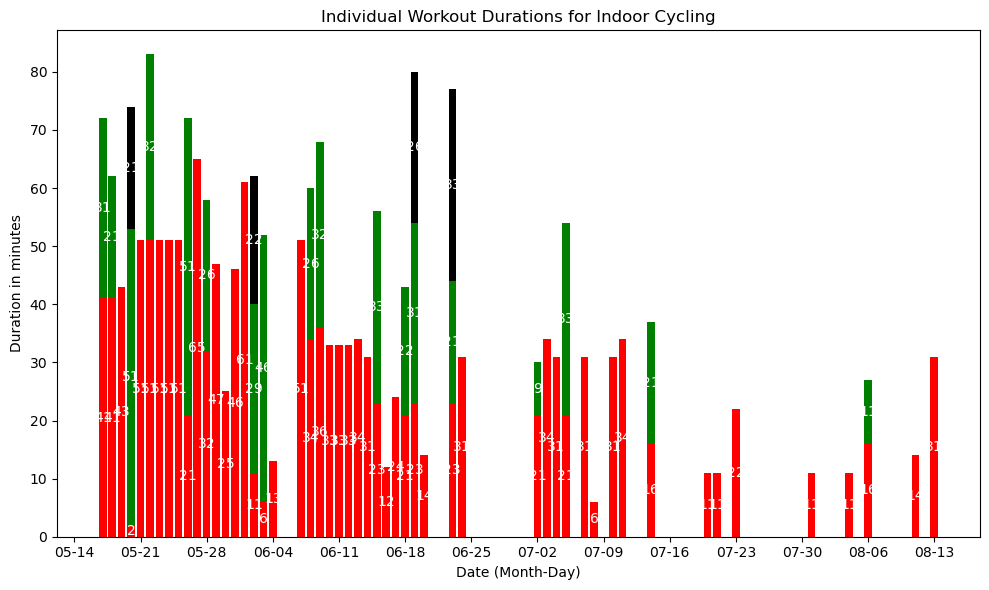

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter

def workout_minutes_per_day(file_path, workout_type):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Convert 'Start' column to datetime and 'Duration' to timedelta
    data['Start'] = pd.to_datetime(data['Start'])
    data['Duration'] = pd.to_timedelta(data['Duration'])
    
    # Filter data for the specific workout type and create a copy to avoid SettingWithCopyWarning
    workout_data = data[data['Workout Type'] == workout_type].copy()
    
    # Calculate duration in minutes and round up to the nearest minute
    workout_data['Duration (mins)'] = np.ceil(workout_data['Duration'].dt.total_seconds() / 60)
    
    # Extract date from 'Start'
    workout_data['Date'] = workout_data['Start'].dt.date
    
    # Sort data by 'Start' to ensure correct order
    workout_data.sort_values(by='Start', inplace=True)
    
    # Group data by date, then create a list of durations per date
    date_groups = workout_data.groupby('Date')['Duration (mins)'].apply(list)
    
    # Plotting the stacked bar chart for individual workouts
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['red', 'green', 'black']  # Colors for the workouts
    
    # For each date, plot the workouts in order with the specified colors
    for date, durations in date_groups.items():
        bottom = 0  # Reset bottom for each new day
        for i, duration in enumerate(durations):
            color = colors[i % len(colors)] if i < len(colors) else colors[-1]  # Use last color for overflow
            bars = ax.bar(date, duration, bottom=bottom, color=color)
            bottom += duration  # Stack the next bar on top of the previous
            ax.text(bars[0].get_x() + bars[0].get_width() / 2, bottom - (duration / 2), f'{int(duration)}', ha='center', va='center', color='white')
    
    ax.xaxis.set_major_locator(DayLocator(interval=7))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
    ax.set_title(f'Individual Workout Durations for {workout_type}')
    ax.set_xlabel('Date (Month-Day)')
    ax.set_ylabel('Duration in minutes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Example usage:
# workout_minutes_per_day('your_file_path.csv', 'Your_Workout_Type')


# Example usage:
# workout_minutes_per_day('your_file_path.csv', 'Your_Workout_Type')
workout_type = 'Indoor Cycling'
workout_minutes_per_day(file_path, workout_type)


## Workout Minutes Per Day

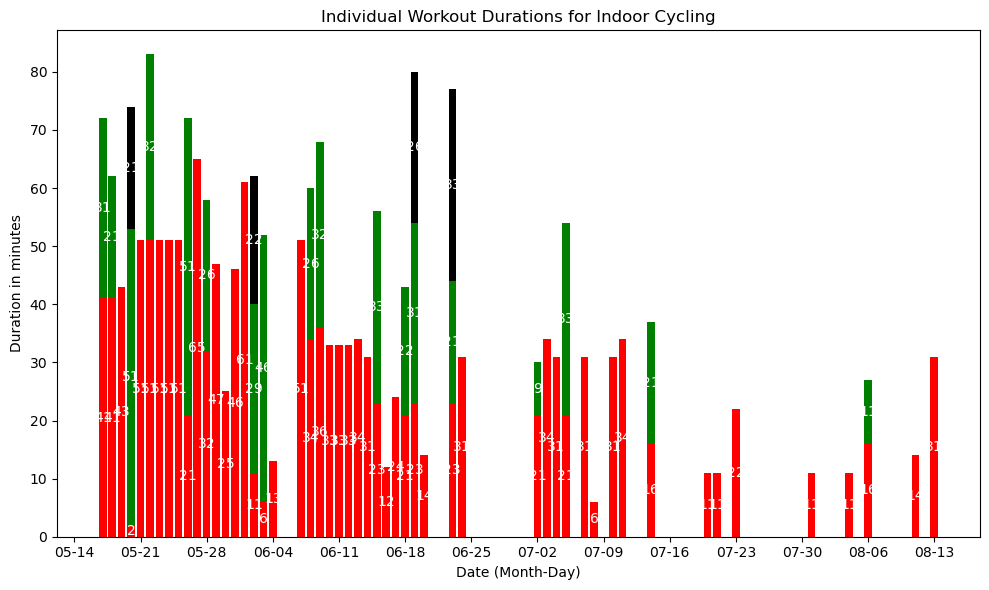

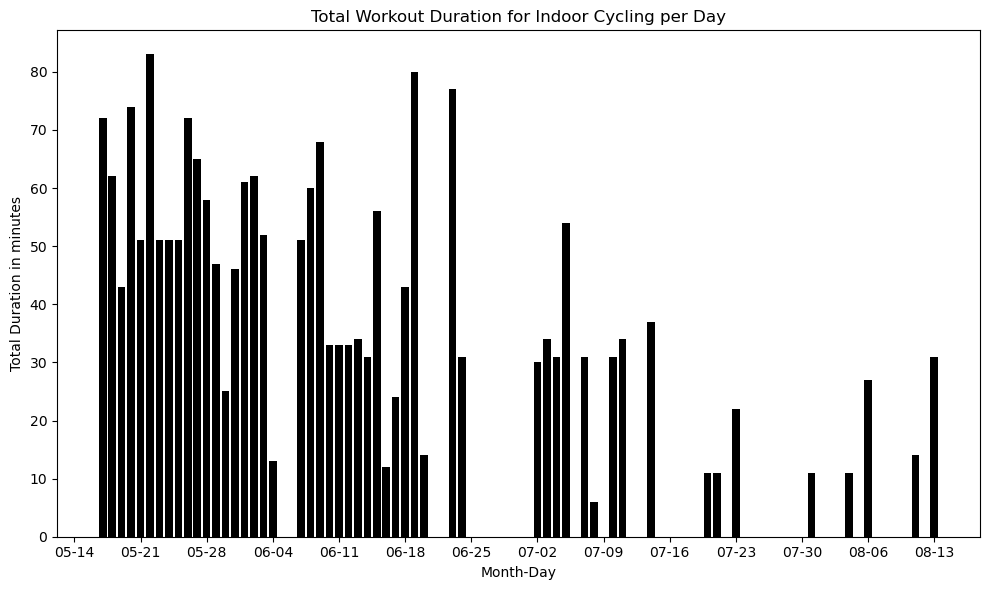

In [123]:

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter

def workout_minutes_per_day(file_path, workout_type):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Convert 'Start' column to datetime and 'Duration' to timedelta
    data['Start'] = pd.to_datetime(data['Start'])
    data['Duration'] = pd.to_timedelta(data['Duration'])
    
    # Filter data for the specific workout type and create a copy to avoid SettingWithCopyWarning
    workout_data = data[data['Workout Type'] == workout_type].copy()
    
    # Calculate duration in minutes and round up to the nearest minute
    workout_data['Duration (mins)'] = np.ceil(workout_data['Duration'].dt.total_seconds() / 60)
    
    # Extract date from 'Start'
    workout_data['Date'] = workout_data['Start'].dt.date
    
    # Sort data by 'Start' to ensure correct order
    workout_data.sort_values(by='Start', inplace=True)
    
    # Group data by date, then create a list of durations per date
    date_groups = workout_data.groupby('Date')['Duration (mins)'].apply(list)
    
    # Plotting the stacked bar chart for individual workouts
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['red', 'green', 'black']  # Colors for the workouts
    
    # For each date, plot the workouts in order with the specified colors
    for date, durations in date_groups.items():
        bottom = 0  # Reset bottom for each new day
        for i, duration in enumerate(durations):
            color = colors[i % len(colors)] if i < len(colors) else colors[-1]  # Use last color for overflow
            bars = ax.bar(date, duration, bottom=bottom, color=color)
            bottom += duration  # Stack the next bar on top of the previous
            ax.text(bars[0].get_x() + bars[0].get_width() / 2, bottom - (duration / 2), f'{int(duration)}', ha='center', va='center', color='white')
    
    ax.xaxis.set_major_locator(DayLocator(interval=7))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
    ax.set_title(f'Individual Workout Durations for {workout_type}')
    ax.set_xlabel('Date (Month-Day)')
    ax.set_ylabel('Duration in minutes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    
    

    
    # Plotting the total duration per day for the workout type
    workout_data['Date'] = pd.to_datetime(workout_data['Date'])  # Convert Date to datetime for plotting
    total_durations = workout_data.groupby('Date')['Duration (mins)'].sum()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(total_durations.index, total_durations, color='black')  # Color changed to black

    # Set the x-axis to show labels every 7 days
    ax.xaxis.set_major_locator(DayLocator(interval=7))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))

    ax.set_title(f'Total Workout Duration for {workout_type} per Day')
    ax.set_xlabel('Month-Day')
    ax.set_ylabel('Total Duration in minutes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Usage example:
workout_type = 'Indoor Cycling'
workout_minutes_per_day(file_path, workout_type)


In [124]:
#print('\nThe current directory is:\n' + color.RED + color.BOLD + os.getcwd() + color.END)
print('Directory:\n' + '\033[91m'+ '\033[1m' + os.getcwd() + '\033[0m')
print('Directory:\n' +   '\033[1m' + os.getcwd() + '\033[0m')
#current_list_of_files = os.listdir()
#for file in current_list_of_files:
#  print(file)




Directory:
/Users/michael/Coding/Apple_Watch_data
Directory:
/Users/michael/Coding/Apple_Watch_data


# Plot Heart Rate

Some Markdown text with <span style="color:red">some *red* text</span>.

<div class="alert alert-block alert-danger">
problem is the issue of the formatting of the date
</div>

 

In [157]:
def plot_heart_rate(file_path, title,file_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import re

    # Extract date from file name
    date_match = re.search(r'\d{8}', file_path)
    if date_match:
        date_str = date_match.group()
        # date_formatted = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
        date_formatted = f"{date_str[:4]}_{date_str[4:6]}_{date_str[6:]}"
    else:
        date_formatted = "Unknown Date"

    # Load the CSV file
    data = pd.read_csv(file_path)

    # Convert the 'Date/Time' column to datetime format
    data['Date/Time'] = pd.to_datetime(data['Date/Time'])

    # Plotting the line chart
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date/Time'], data['Avg (count/min)'], label='Average Heart Rate', color='blue')
    plt.plot(data['Date/Time'], data['Min (count/min)'], label='Min Heart Rate', color='green')
    plt.plot(data['Date/Time'], data['Max (count/min)'], label='Max Heart Rate', color='red')

    # Adding titles and labels
    # plt.title(f'Heart Rate Over Time During Indoor Cycling on {date_formatted}')
    # plt.title(f'Heart Rate Over Time During Indoor Cycling on {title}')
    plt.title(f'{title}')
    plt.xlabel('Time (hh:mm)')
    plt.ylabel('Heart Rate (count/min)')
    plt.legend()
    plt.grid(True)

    # Format x-axis labels to hh:mm
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

    # Show plot with x-axis labels
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(file_name, format='pdf')

    plt.show()



    return data

# here


In [138]:
os.getcwd()


'/Users/michael/Coding/Apple_Watch_data'

In [160]:
starting_directory = '/Users/michael/Coding/Apple_Watch_data'

os.chdir('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Data/Exercise_Data')

print(f'current directory: {os.getcwd()}')
# libraryFiles = os.listdir()
# libraryFiles.sort()
# libraryFiles[:10]

cycling_files = [file for file in os.listdir() \
                 if file.startswith('Outdoor Cycling-Heart Rate-') \
                 & file.endswith('.csv')
            ]
cycling_files.sort()
print(f'Files: ')
for num, name in enumerate(cycling_files, start=1): 
	print("{0:3}: {1}".format(num, name))
 
# file_path = 'Outdoor Cycling-Heart Rate-20240814_125440.csv'
# cycling_df = pd.read_csv(file_path)
# if os.getcwd() != starting_directory:
#     os.chdir(starting_directory)
# assert os.getcwd() == starting_directory , 'We should be in starting directory'
# os.getcwd()

current directory: /Users/michael/Library/Mobile Documents/com~apple~CloudDocs/Data/Exercise_Data
Files: 
  1: Outdoor Cycling-Heart Rate-20240525_180602.csv
  2: Outdoor Cycling-Heart Rate-20240531_170544 2.csv
  3: Outdoor Cycling-Heart Rate-20240531_170544.csv
  4: Outdoor Cycling-Heart Rate-20240612_173007.csv
  5: Outdoor Cycling-Heart Rate-20240613_154136 2.csv
  6: Outdoor Cycling-Heart Rate-20240613_154136.csv
  7: Outdoor Cycling-Heart Rate-20240614_192450.csv
  8: Outdoor Cycling-Heart Rate-20240615_194924.csv
  9: Outdoor Cycling-Heart Rate-20240617_090640.csv
 10: Outdoor Cycling-Heart Rate-20240627_124142.csv
 11: Outdoor Cycling-Heart Rate-20240628_104445 2.csv
 12: Outdoor Cycling-Heart Rate-20240628_104445.csv
 13: Outdoor Cycling-Heart Rate-20240629_094030.csv
 14: Outdoor Cycling-Heart Rate-20240629_112918.csv
 15: Outdoor Cycling-Heart Rate-20240703_142117.csv
 16: Outdoor Cycling-Heart Rate-20240705_184518.csv
 17: Outdoor Cycling-Heart Rate-20240706_163901.csv
 18:

In [151]:
# cycling_df.head()

,Date/Time,Min (count/min),Max (count/min),Avg (count/min),Source
0,2024-08-14 12:54:40,78,86,81.47,Michael’s Apple Watch
1,2024-08-14 12:55:40,80,87,83.93,Michael’s Apple Watch
2,2024-08-14 12:56:40,80,87,84.28,Michael’s Apple Watch
3,2024-08-14 12:57:40,86,92,89.01,Michael’s Apple Watch
4,2024-08-14 12:58:40,95,97,96.12,Michael’s Apple Watch


# Create Folders

In [167]:
def create_and_move_files(folder_names, base_directory='.'):
    """
    Creates folders based on a list of strings and moves files that start with the folder names into the respective folders.

    Parameters:
    - folder_names (list of str): The list of folder names to create.
    - base_directory (str): The base directory where the folders will be created and files will be searched. Default is the current directory.
    """
    for folder_name in folder_names:
        # Create the folder
        folder_path = os.path.join(base_directory, folder_name)
        os.makedirs(folder_path, exist_ok=True)
        count = 0
        # Find and move files starting with the folder name
        for file_name in os.listdir(base_directory):
            if file_name.startswith(folder_name) and os.path.isfile(os.path.join(base_directory, file_name)):
                src_path = os.path.join(base_directory, file_name)
                dest_path = os.path.join(folder_path, file_name)
                shutil.move(src_path, dest_path)
                count  += 1
                # print(f"Moved file '{file_name}' to folder '{folder_name}'.")
        print(f' {count} files moved to {folder_name}')

In [168]:
import shutil


os.chdir('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Data/Exercise_Data')

# Example usage:
folder_names = ['Outdoor Cycling', 'Indoor Cycling','Outdoor Walk','Indoor Walk','Rowing',
                'Core Training']
create_and_move_files(folder_names)



if os.getcwd() != starting_directory:
    os.chdir(starting_directory)
assert os.getcwd() == starting_directory , 'We should be in starting directory'


 0 files moved to Outdoor Cycling
 0 files moved to Indoor Cycling
 0 files moved to Outdoor Walk
 35 files moved to Indoor Walk
 44 files moved to Rowing
 0 files moved to Core Training


file_path: Outdoor Cycling-Heart Rate-20240814_125440.csv
title Outdoor Cycling-Heart Rate-20240814_125440


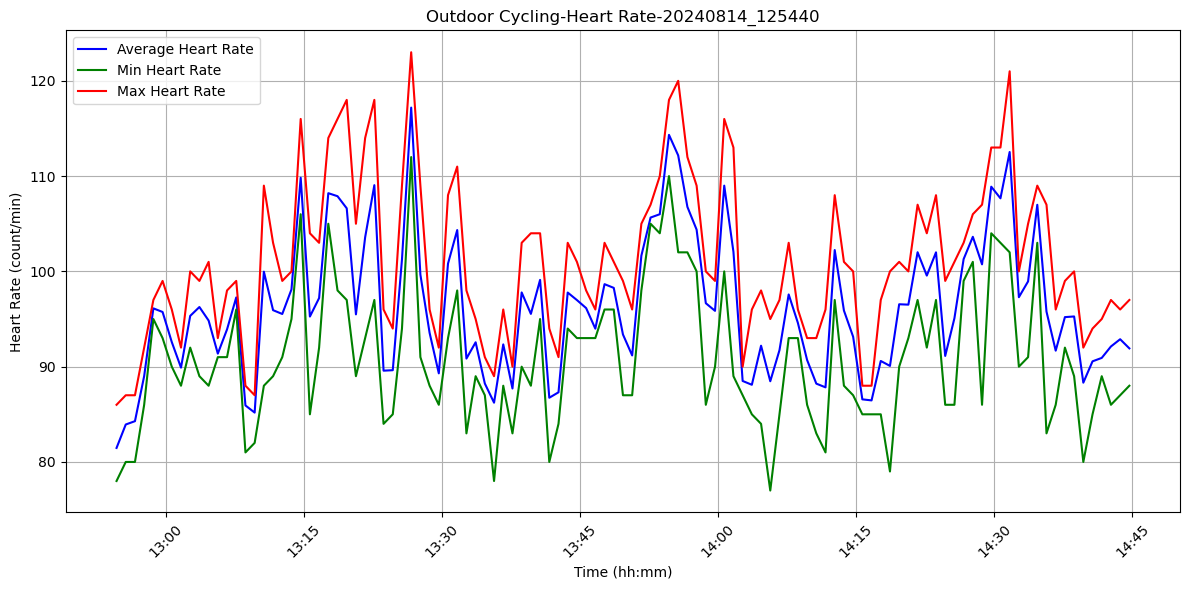

In [159]:
# Example usage
# file_path= 'Indoor Cycling-Heart Rate-20240521_072244 3.csv'
# file_path = 'Indoor Cycling-Heart Rate-20240520_084208.csv'
# file_path = 'Indoor Cycling-Heart Rate-20240517_081237.csv'
print(f'file_path: {file_path}')

title = file_path.split('.csv')[0]
print(f'title {title}')
# title = 'Indoor Cycling-Heart Rate-2024_05_20.pdf'
data1 = plot_heart_rate(file_path, title,'Indoor_Cycling_2024_05_20')
if os.getcwd() != starting_directory:
    os.chdir(starting_directory)
assert os.getcwd() == starting_directory , 'We should be in starting directory'


In [127]:
data1.head()

,Date/Time,Min (count/min),Max (count/min),Avg (count/min),Source
0,2024-05-21 07:22:44,82,93,88.17,Michael’s Apple Watch
1,2024-05-21 07:23:44,89,99,95.08,Michael’s Apple Watch
2,2024-05-21 07:24:44,98,102,100.08,Michael’s Apple Watch
3,2024-05-21 07:25:44,95,100,97.79,Michael’s Apple Watch
4,2024-05-21 07:26:44,99,103,100.79,Michael’s Apple Watch


File:   Indoor Cycling-Heart Rate-20240521_072244 3.csv


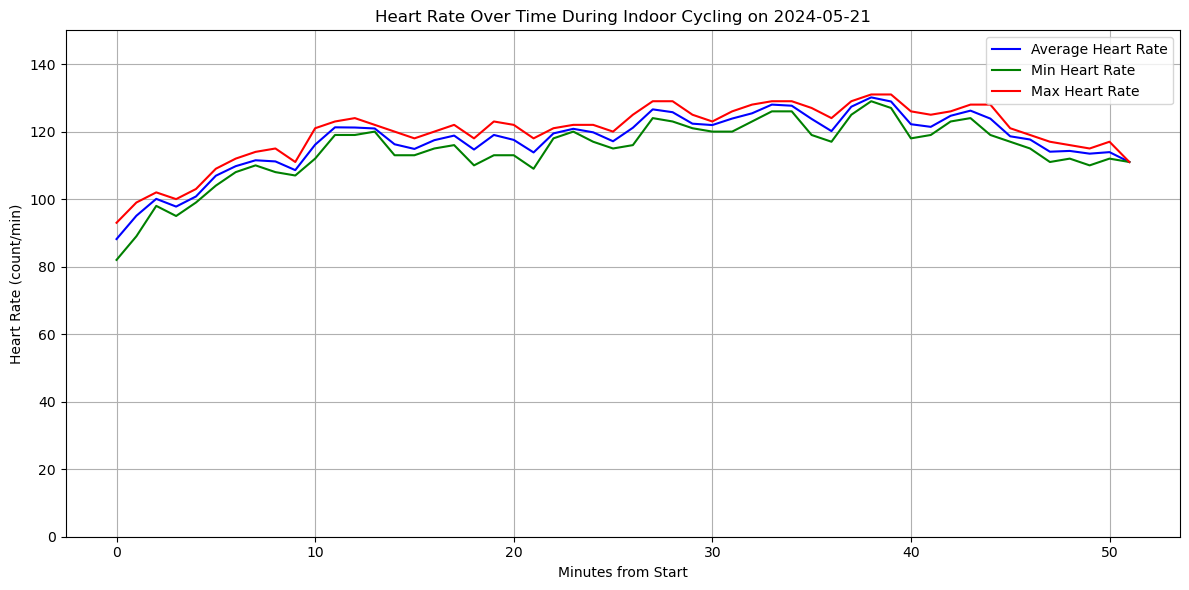

In [129]:
def plot_heart_rate_mins(file_path):
    import pandas as pd
    import matplotlib.pyplot as plt
    import re

    # Extract date and time from file name
    date_time_match = re.search(r'(\d{8})_(\d{6})', file_path)
    if date_time_match:
        date_str = date_time_match.group(1)
        time_str = date_time_match.group(2)
        date_formatted = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
        start_time = pd.to_datetime(f"{date_str} {time_str}", format='%Y%m%d %H%M%S')
    else:
        date_formatted = "Unknown Date"
        start_time = None

    # Load the CSV file
    data = pd.read_csv(file_path)

    # Convert the 'Date/Time' column to datetime format
    data['Date/Time'] = pd.to_datetime(data['Date/Time'])

    # Calculate minutes from the start of the workout
    if start_time:
        data['Minutes from Start'] = (data['Date/Time'] - start_time).dt.total_seconds() / 60
    else:
        data['Minutes from Start'] = 0

    # Plotting the line chart
    plt.figure(figsize=(12, 6))
    plt.plot(data['Minutes from Start'], data['Avg (count/min)'], label='Average Heart Rate', color='blue')
    plt.plot(data['Minutes from Start'], data['Min (count/min)'], label='Min Heart Rate', color='green')
    plt.plot(data['Minutes from Start'], data['Max (count/min)'], label='Max Heart Rate', color='red')

    # Setting y-axis limit
    plt.ylim(0, 150)
    # Adding titles and labels
    plt.title(f'Heart Rate Over Time During Indoor Cycling on {date_formatted}')
    plt.xlabel('Minutes from Start')
    plt.ylabel('Heart Rate (count/min)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to ensure a fresh start in the next loop iteration

    return data

print(f'File:   {file_path}')
# Example usage
data1 = plot_heart_rate_mins(file_path)


# go to iCloud

In [34]:
os.chdir('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Exercise')
os.getcwd()
libraryFiles = os.listdir()
libraryFiles.sort()
libraryFiles[:10]

cycling_files = [file for file in os.listdir() \
                 if file.startswith('Indoor Cycling-Heart Rate-') \
                 & file.endswith('.csv')
            ]
cycling_files.sort()
cycling_files

[]

In [94]:
import os
import re


# Overall, this script renames files in the current directory from the format Indoor Cycling-Heart Rate-YYYYMMDD_HHMMSS.csv to 
# Cycling-Heart Rate-YYYY_MM_DD.csv.



# Define the directory containing the CSV files
# directory = 'path_to_your_directory'
directory = os.getcwd()
# Regular expression to match the original filenames
pattern = re.compile(r'Indoor Cycling-Heart Rate-(\d{4})(\d{2})(\d{2})_\d{6}.csv')

# Iterate over the files in the directory
for filename in os.listdir():
    match = pattern.match(filename)
    if match:
        year, month, day = match.groups()
        new_filename = f'Cycling-Heart Rate-{year}_{month}_{day}.csv'
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, new_filename)
        os.rename(old_filepath, new_filepath)
        print(f'Renamed: {filename} to {new_filename}')


In [117]:
cycling_files = [file for file in os.listdir() \
                 if file.startswith('Cycling-Heart Rate-') \
                 & file.endswith('.csv')
            ]
cycling_files.sort()
cycling_files

['Cycling-Heart Rate-2024_05_17.csv',
 'Cycling-Heart Rate-2024_05_20.csv',
 'Cycling-Heart Rate-2024_05_21.csv',
 'Cycling-Heart Rate-2024_05_22.csv',
 'Cycling-Heart Rate-2024_05_23.csv',
 'Cycling-Heart Rate-2024_05_24.csv',
 'Cycling-Heart Rate-2024_05_25.csv',
 'Cycling-Heart Rate-2024_05_26.csv']

# why Unknown date????

In [107]:
def plot_heart_rate(file_path, date, file_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import re

    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract date and time from file name
    date_time_match = re.search(r'(\d{8})_(\d{6})', file_path)
    if date_time_match:
        date_str = date_time_match.group(1)
        time_str = date_time_match.group(2)
        date_formatted = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
        start_time = pd.to_datetime(f"{date_str} {time_str}", format='%Y%m%d %H%M%S')
    else:
        date_formatted = "Unknown Date"
        start_time = None

    # Convert the 'Date/Time' column to datetime format
    data['Date/Time'] = pd.to_datetime(data['Date/Time'])

    # Calculate minutes from the start of the workout
    if start_time:
        data['Minutes from Start'] = (data['Date/Time'] - start_time).dt.total_seconds() / 60
    else:
        data['Minutes from Start'] = (data['Date/Time'] - data['Date/Time'].iloc[0]).dt.total_seconds() / 60

    # Plotting the line chart
    plt.figure(figsize=(12, 6))
    plt.plot(data['Minutes from Start'], data['Avg (count/min)'], label='Average Heart Rate', color='blue')
    plt.plot(data['Minutes from Start'], data['Min (count/min)'], label='Min Heart Rate', color='green')
    plt.plot(data['Minutes from Start'], data['Max (count/min)'], label='Max Heart Rate', color='red')

    # Setting y-axis limit
    plt.ylim(0, 150)

    # Adding titles and labels
    plt.title(f'Heart Rate Over Time During Indoor Cycling on {date_formatted}')
    plt.xlabel('Minutes from Start')
    plt.ylabel('Heart Rate (count/min)')
    plt.legend()
    plt.grid(True)

    # Save plot as PDF
    plt.savefig(file_name)

    # Show plot
    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to ensure a fresh start in the next loop iteration

    return data


Cycling-Heart Rate-2024_05_17.csv


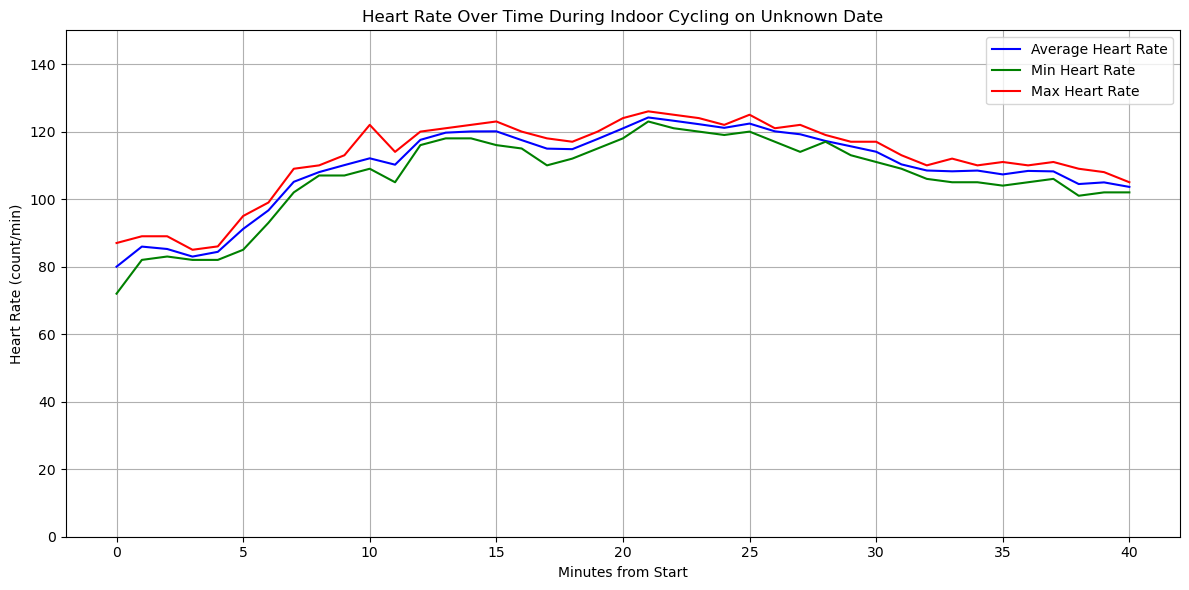

Cycling-Heart Rate-2024_05_20.csv


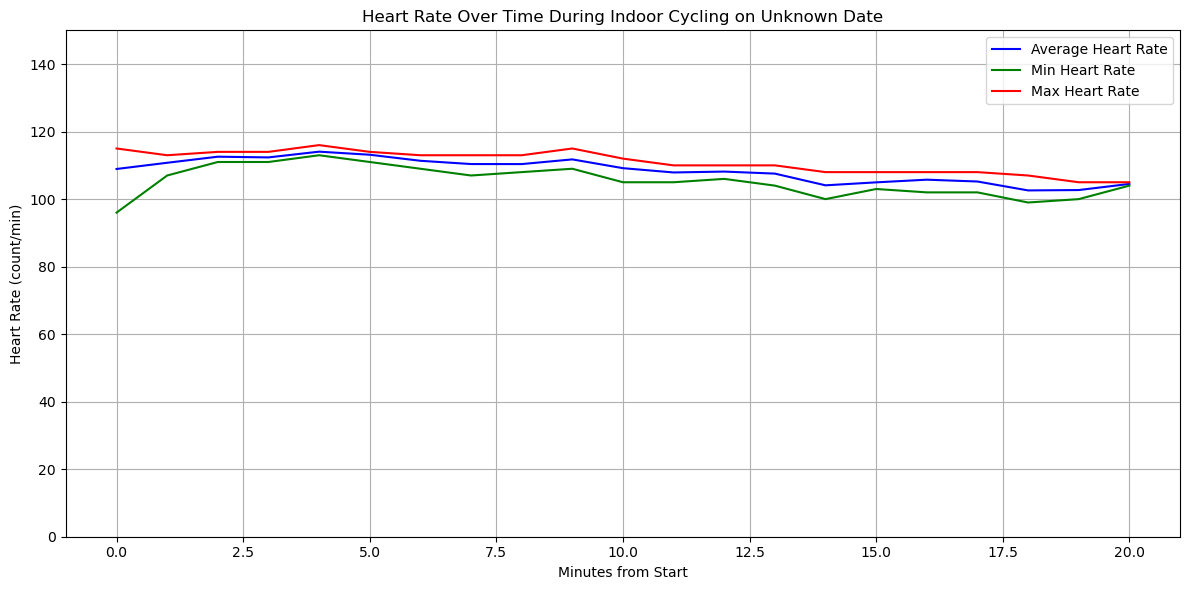

Cycling-Heart Rate-2024_05_21.csv


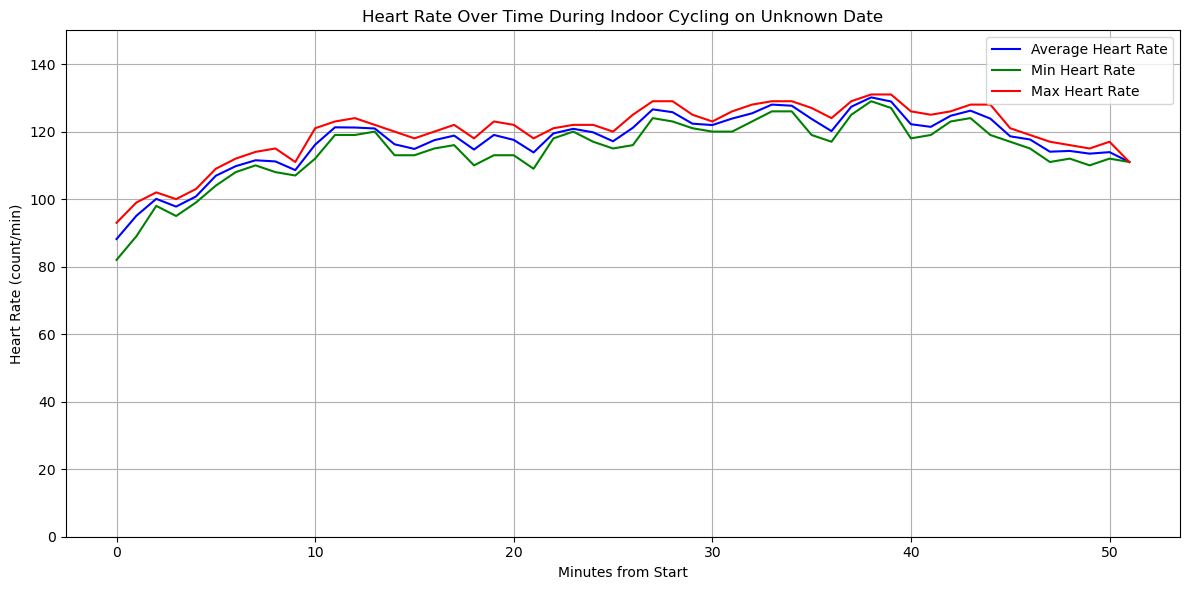

Cycling-Heart Rate-2024_05_22.csv


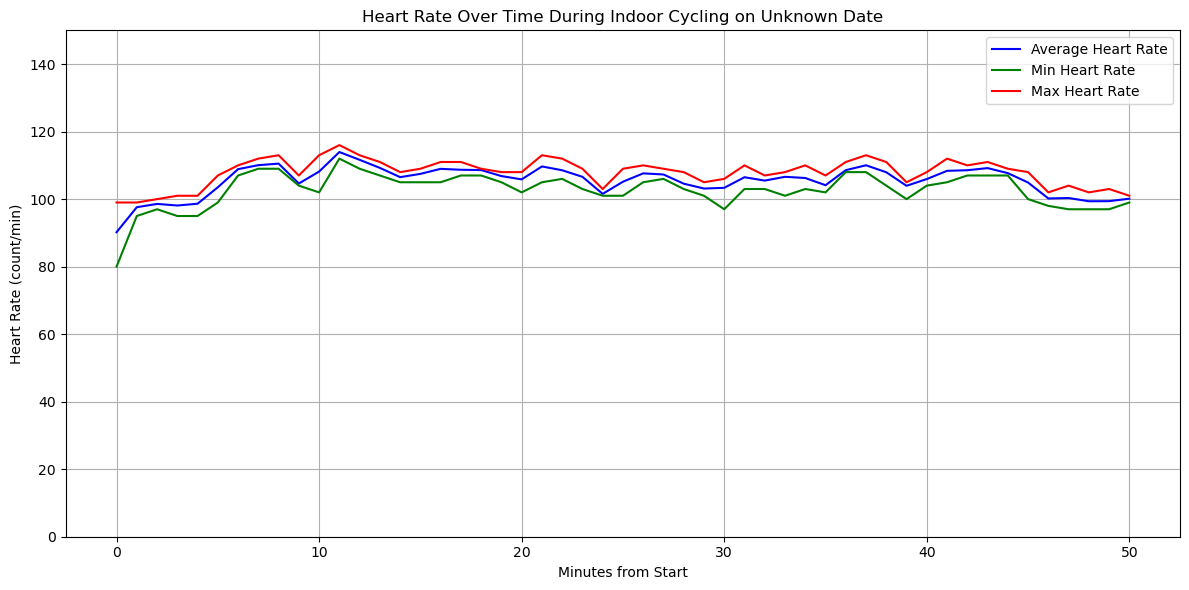

Cycling-Heart Rate-2024_05_23.csv


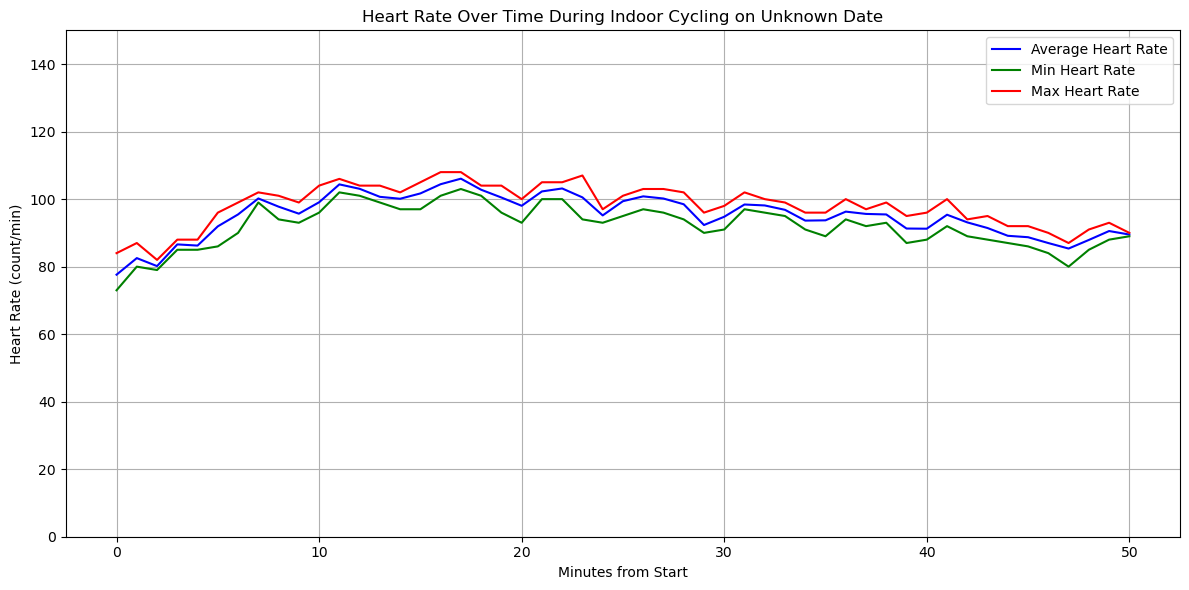

In [108]:

for file_path in cycling_files[:5]:
    print(file_path)
    date = file_path.split('.csv')[0].replace('Cycling-Heart Rate-','')
    file_name = 'Cycling-Heart Rate ' + date + '.pdf'
    data1 = plot_heart_rate(file_path, 
                            date,
                           file_name)


# All on a single plot

In [118]:
cycling_files

['Cycling-Heart Rate-2024_05_17.csv',
 'Cycling-Heart Rate-2024_05_20.csv',
 'Cycling-Heart Rate-2024_05_21.csv',
 'Cycling-Heart Rate-2024_05_22.csv',
 'Cycling-Heart Rate-2024_05_23.csv',
 'Cycling-Heart Rate-2024_05_24.csv',
 'Cycling-Heart Rate-2024_05_25.csv',
 'Cycling-Heart Rate-2024_05_26.csv']

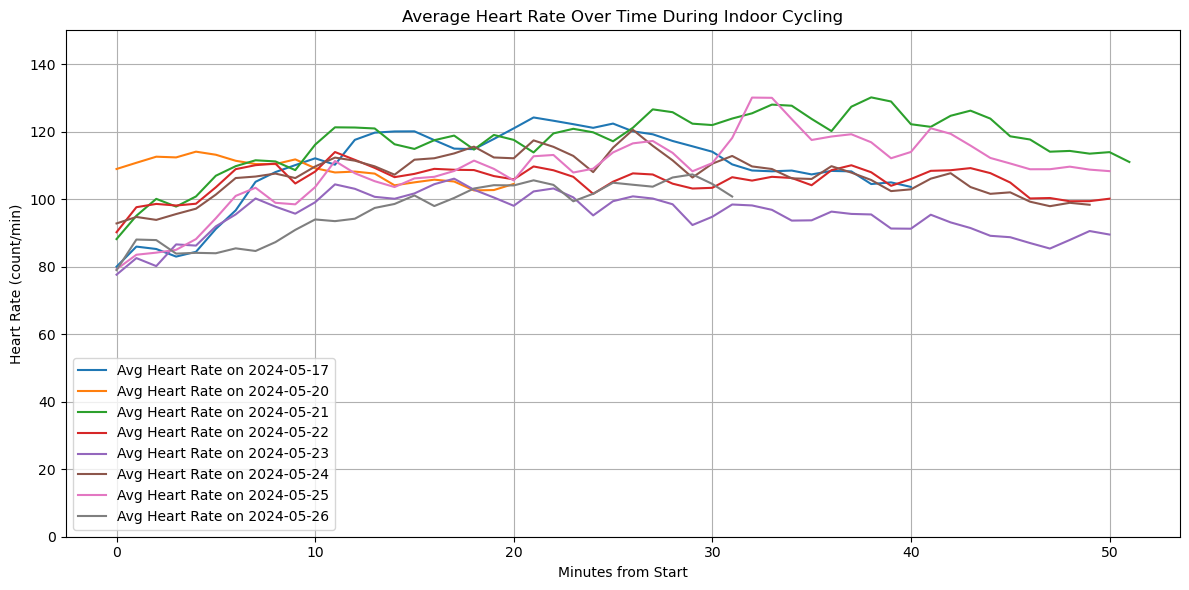

In [119]:
def plot_average_heart_rate(files):
    import pandas as pd
    import matplotlib.pyplot as plt
    import re

    plt.figure(figsize=(12, 6))
    
    for file_path in files:
        # Extract date from file name
        date_match = re.search(r'(\d{4}_\d{2}_\d{2})', file_path)
        if date_match:
            date_str = date_match.group(1)
            date_formatted = date_str.replace('_', '-')
        else:
            date_formatted = "Unknown Date"

        # Load the CSV file
        data = pd.read_csv(file_path)

        # Convert the 'Date/Time' column to datetime format
        data['Date/Time'] = pd.to_datetime(data['Date/Time'])

        # Calculate minutes from the start of the workout
        start_time = data['Date/Time'].iloc[0]
        data['Minutes from Start'] = (data['Date/Time'] - start_time).dt.total_seconds() / 60

        # Plotting the average heart rate line
        plt.plot(data['Minutes from Start'], data['Avg (count/min)'], label=f'Avg Heart Rate on {date_formatted}')

    # Setting y-axis limit
    plt.ylim(0, 150)

    # Adding titles and labels
    plt.title('Average Heart Rate Over Time During Indoor Cycling')
    plt.xlabel('Minutes from Start')
    plt.ylabel('Heart Rate (count/min)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage

    # Add more file paths as needed


plot_average_heart_rate(cycling_files)


In [ ]:
% Section for the second chart
\section{Chart 2 Title}
\begin{figure}[ht]
    \centering
    \includegraphics[width=\textwidth,height=\textheight,keepaspectratio]{Indoor Cycling-Heart Rate-2024_05_20.pdf}
    \caption{Chart 2 Description}
\end{figure}
\newpage


In [85]:
cycling_files

['Cycling-Heart Rate-2024_05_20.csv',
 'Cycling-Heart Rate-2024_05_21.csv',
 'Cycling-Heart Rate-2024_05_22.csv',
 'Cycling-Heart Rate-2024_05_23.csv',
 'Cycling-Heart Rate-2024_05_24.csv',
 'Cycling-Heart Rate-2024_05_25.csv',
 'Cycling-Heart Rate-2024_05_26.csv']

In [87]:
cycling_file_PDFs = [file for file in os.listdir() if file.startswith('Cycling-Heart Rate') & file.endswith('.pdf')]
cycling_file_PDFs

['Cycling-Heart Rate 2024_05_20.pdf',
 'Cycling-Heart Rate 2024_05_21.pdf',
 'Cycling-Heart Rate 2024_05_23.pdf',
 'Cycling-Heart Rate 2024_05_22.pdf',
 'Cycling-Heart Rate 2024_05_24.pdf']

In [93]:
def generate_latex_code(file_list):
    latex_code = ""
    for i, file in enumerate(file_list):
        # section_title = f"Chart {i+1} Title"
        section_title = f"Chart {file.replace('_',' ').replace('.pdf','')} "
        caption = f"Chart {i+1} Description"
        latex_code += f"""
% Section for the {section_title}
\\section{{{section_title}}}
\\begin{{figure}}[ht]
    \\centering
    \\includegraphics[width=\\textwidth,height=\\textheight,keepaspectratio]{{{file}}}
    \\caption{{{caption}}}
\\end{{figure}}
\\newpage
"""
    return latex_code


file_list =  cycling_file_PDFs[:5]
latex_code = generate_latex_code(file_list)
print(latex_code)



% Section for the Chart Cycling-Heart Rate 2024 05 20 
\section{Chart Cycling-Heart Rate 2024 05 20 }
\begin{figure}[ht]
    \centering
    \includegraphics[width=\textwidth,height=\textheight,keepaspectratio]{Cycling-Heart Rate 2024_05_20.pdf}
    \caption{Chart 1 Description}
\end{figure}
\newpage

% Section for the Chart Cycling-Heart Rate 2024 05 21 
\section{Chart Cycling-Heart Rate 2024 05 21 }
\begin{figure}[ht]
    \centering
    \includegraphics[width=\textwidth,height=\textheight,keepaspectratio]{Cycling-Heart Rate 2024_05_21.pdf}
    \caption{Chart 2 Description}
\end{figure}
\newpage

% Section for the Chart Cycling-Heart Rate 2024 05 23 
\section{Chart Cycling-Heart Rate 2024 05 23 }
\begin{figure}[ht]
    \centering
    \includegraphics[width=\textwidth,height=\textheight,keepaspectratio]{Cycling-Heart Rate 2024_05_23.pdf}
    \caption{Chart 3 Description}
\end{figure}
\newpage

% Section for the Chart Cycling-Heart Rate 2024 05 22 
\section{Chart Cycling-Heart Rate 2024

In [ ]:
os.chdir('/Users/michael/Library/Mobile Documents/com~apple~CloudDocs')


iCloud_location = '/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs'



# os.chdir('/Users/Vigoda/Library/Mobile Documents/com~apple~CloudDocs/CMS_Project_on_iCloud_Drive')
os.chdir('/Users/michael/Library/Mobile Documents/com~apple~CloudDocs')
os.chdir('CMS_Project_on_iCloud_Drive')
print('\nCurrent directory:\n' + os.getcwd())
list_of_files = [i for i in os.listdir() if i.endswith(".csv")  ]
list_of_files


# NOTE: Only shows files that are downloaded from the cloud 

# Generate Latex Code to produce a PDF of the charts

In [35]:
pdflatex Generate_PDF_of_Charts.tex
pdflatex Generate_PDF_of_Charts.tex


SyntaxError: invalid syntax (3864876114.py, line 1)

In [36]:

# The name of your LaTeX file
tex_file = 'Generate_PDF_of_Charts.tex'

# Run pdflatex twice to ensure the TOC is updated
subprocess.run(['pdflatex', tex_file])
subprocess.run(['pdflatex', tex_file])


FileNotFoundError: [Errno 2] No such file or directory: 'pdflatex'

# Bottom


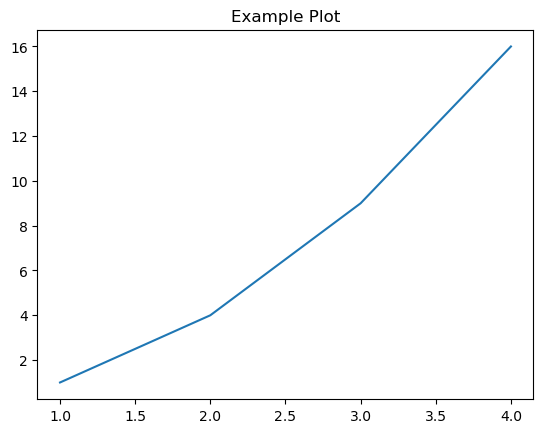

In [28]:

# Your plotting code here
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title('Example Plot')

# Save the plot as a PDF
plt.savefig('example_plot.pdf', format='pdf')

# Optionally, display the plot
plt.show()


In [30]:
import subprocess
_ = subprocess.call(['open',  os.getcwd()]) 

## Read Most Recent Data File of Workouts Overview


In [7]:
most_recent_file

'Workouts-2024-05_17_2024_08_15.csv'

In [8]:
data = pd.read_csv(most_recent_file)
data.head(10)

,Workout Type,Start,End,Duration,Active Energy (kcal),Max. Heart Rate (bpm),Avg. Heart Rate (bpm),Distance (mi),Max. Speed (mi/hr),Avg. Speed (mi/hr),Elevation Ascended (ft),Elevation Descended (ft),Location,Unnamed: 13
0,Outdoor Cycling,2024-08-14 12:54,2024-08-14 14:45,01:39:07,582.480410,123.0,96.259051,20.011887,0.0,0.0,419.028871,0.0,Outdoor,NaN
1,Outdoor Cycling,2024-08-13 12:43,2024-08-13 14:21,01:30:20,728.040219,118.0,110.800000,21.014011,0.0,0.0,439.862205,0.0,Outdoor,NaN
2,Indoor Cycling,2024-08-13 08:44,2024-08-13 09:14,00:30:10,185.167787,138.0,120.707741,0.000000,0.0,0.0,0.000000,0.0,Indoor,NaN
3,Outdoor Cycling,2024-08-11 12:48,2024-08-11 15:26,02:13:16,841.408105,134.0,103.309240,27.881372,0.0,0.0,594.980315,0.0,Outdoor,NaN
4,Indoor Cycling,2024-08-11 11:39,2024-08-11 11:52,00:13:02,49.758930,94.0,78.047619,0.000000,0.0,0.0,0.000000,0.0,Indoor,NaN
5,Outdoor Cycling,2024-08-10 18:48,2024-08-10 19:57,01:08:25,404.809423,116.0,95.306413,14.132776,0.0,0.0,282.709974,0.0,Outdoor,NaN
6,Outdoor Walk,2024-08-10 09:47,2024-08-10 10:57,00:52:30,227.516121,111.0,81.348856,1.971281,0.0,0.0,346.620735,0.0,Outdoor,NaN
7,Outdoor Cycling,2024-08-09 13:46,2024-08-09 16:23,01:51:38,664.804062,118.0,91.499129,22.811185,0.0,0.0,418.536745,0.0,Outdoor,NaN
8,Outdoor Walk,2024-08-09 09:46,2024-08-09 10:13,00:24:05,82.020652,95.0,78.967713,0.828101,0.0,0.0,83.464567,0.0,Outdoor,NaN
9,Outdoor Walk,2024-08-09 09:21,2024-08-09 09:35,00:14:23,58.247067,95.0,85.554766,0.512413,0.0,0.0,93.897638,0.0,Outdoor,NaN
